# Preparativos

## Importacion de librerias

In [160]:
#Importando librerias
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importacion de Archivos

In [140]:
# Funcion para leer la ruta de los archivos
def obtener_pacientes(ruta_archivo):
    df = pd.read_csv(ruta_archivo)
    return df
# Variables de las rutas de los Archivos
ruta_sanos = "D:/Documents/Python/Enfermedades analisis/Grupo_1/Pacientes_sanos.csv"
ruta_enfermos = "D:/Documents/Python/Enfermedades analisis/Grupo_2/Pacientes_enfermos.csv"
# Variables de los pacientes
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)
# Imprsion en consola de las listas de los pacientes
print("Pacientes sanos:", df_sanos)
print("Pacientes enfermos:", df_enfermos)

Pacientes sanos:          Paciente  Tiempos de interlatido
0       Paciente1                   0.711
1       Paciente2                   1.016
2       Paciente3                   0.734
3       Paciente4                   0.719
4       Paciente5                   0.656
...           ...                     ...
144604  Paciente5                   0.641
144605  Paciente5                   0.641
144606  Paciente5                   0.641
144607  Paciente5                   0.641
144608  Paciente5                   0.633

[144609 rows x 2 columns]
Pacientes enfermos:          Paciente  Tiempos de interlatido
0       Paciente1                   0.828
1       Paciente2                   0.864
2       Paciente3                   0.620
3       Paciente4                   0.724
4       Paciente5                   0.708
...           ...                     ...
139278  Paciente3                   0.544
139279  Paciente3                   0.532
139280  Paciente3                   0.536
139281  Paci

## Creación del archivo CSV

In [124]:
# Convertir las listas en DataFrames y añadir la columna "Grupo"
ddf_sanos = pd.DataFrame(df_sanos, columns=['Paciente'])  # Convierte la lista en DataFrame
ddf_sanos['Grupo'] = 'Sano'

ddf_enfermos = pd.DataFrame(df_enfermos, columns=['Paciente'])  # Convierte la lista en DataFrame
ddf_enfermos['Grupo'] = 'Enfermo'

# Fusionar los DataFrames
df_fusionado = pd.concat([ddf_sanos, ddf_enfermos]).drop_duplicates().reset_index(drop=True)

# Nombre del archivo CSV donde se guardarán los datos fusionados
nombre_archivo = "D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv"

# Guardar los datos en el archivo CSV
df_fusionado.to_csv(nombre_archivo, index=False, encoding='utf-8')

print(f"Archivo {nombre_archivo} creado exitosamente.")

Archivo D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv creado exitosamente.


# Comparación

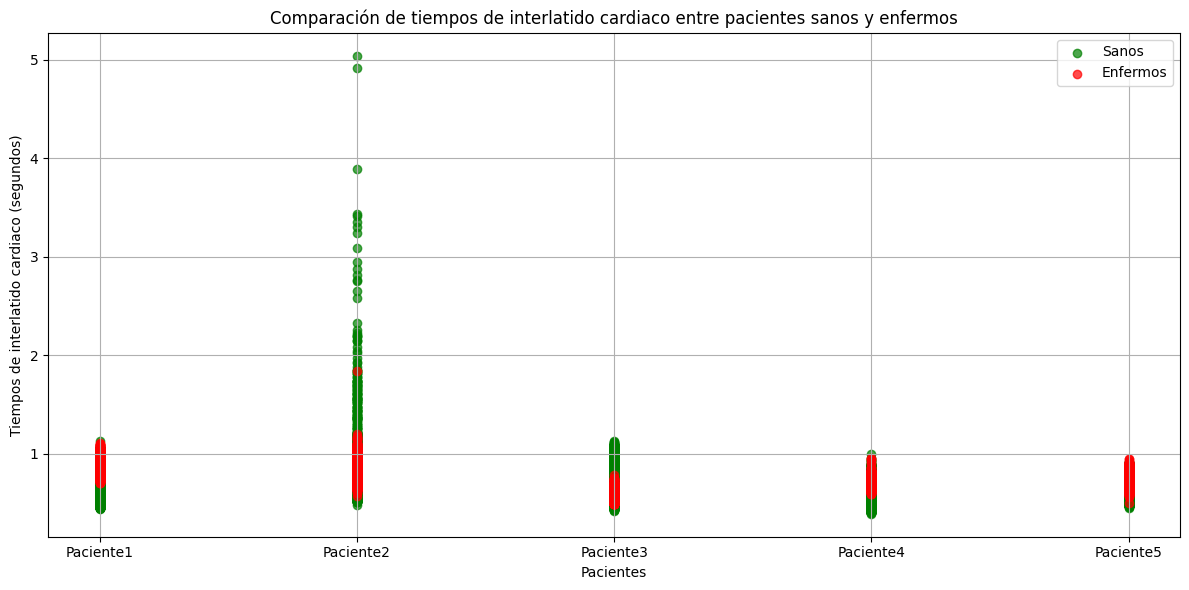

In [147]:
# Cargar los datos de pacientes sanos y enfermos
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)

# Visualización de los tiempos de interlatido cardiaco por tipo de paciente
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para pacientes sanos
plt.scatter(df_sanos['Paciente'], df_sanos['Tiempos de interlatido'], label='Sanos', color='green', alpha=0.7)

# Gráfico de dispersión para pacientes enfermos
plt.scatter(df_enfermos['Paciente'], df_enfermos['Tiempos de interlatido'], label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Tiempos de interlatido cardiaco (segundos)')
plt.title('Comparación de tiempos de interlatido cardiaco entre pacientes sanos y enfermos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Medidas de tendencia central

## Media

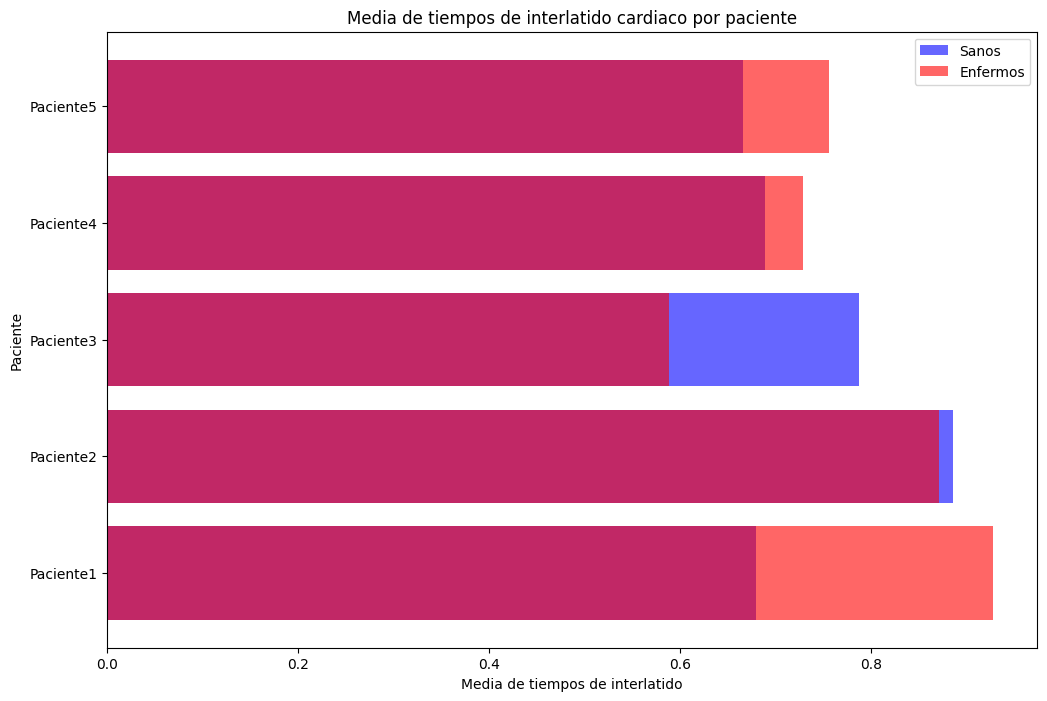

Media de tiempos de interlatido por paciente (Sanos):
Paciente
Paciente1    0.679775
Paciente2    0.886414
Paciente3    0.787494
Paciente4    0.689301
Paciente5    0.665767
Name: Tiempos de interlatido, dtype: float64

Media de tiempos de interlatido por paciente (Enfermos):
Paciente
Paciente1    0.928211
Paciente2    0.871537
Paciente3    0.589019
Paciente4    0.729203
Paciente5    0.756797
Name: Tiempos de interlatido, dtype: float64


In [144]:
# Media
# Calcular la media de los tiempos de interlatido por paciente
media_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].mean()
media_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].mean()

# Preparar datos para el gráfico de barras
pacientes_sanos = media_sanos.index
tiempos_sanos = media_sanos.values

pacientes_enfermos = media_enfermos.index
tiempos_enfermos = media_enfermos.values

# Graficar gráfico de barras
plt.figure(figsize=(12, 8))

plt.barh(pacientes_sanos, tiempos_sanos, label='Sanos', color='blue', alpha=0.6)
plt.barh(pacientes_enfermos, tiempos_enfermos, label='Enfermos', color='red', alpha=0.6)

plt.xlabel('Media de tiempos de interlatido')
plt.ylabel('Paciente')
plt.title('Media de tiempos de interlatido cardiaco por paciente')
plt.legend()

plt.show()

# Imprimir las medias
print("Media de tiempos de interlatido por paciente (Sanos):")
print(media_sanos)
print("\nMedia de tiempos de interlatido por paciente (Enfermos):")
print(media_enfermos)

## Mediana

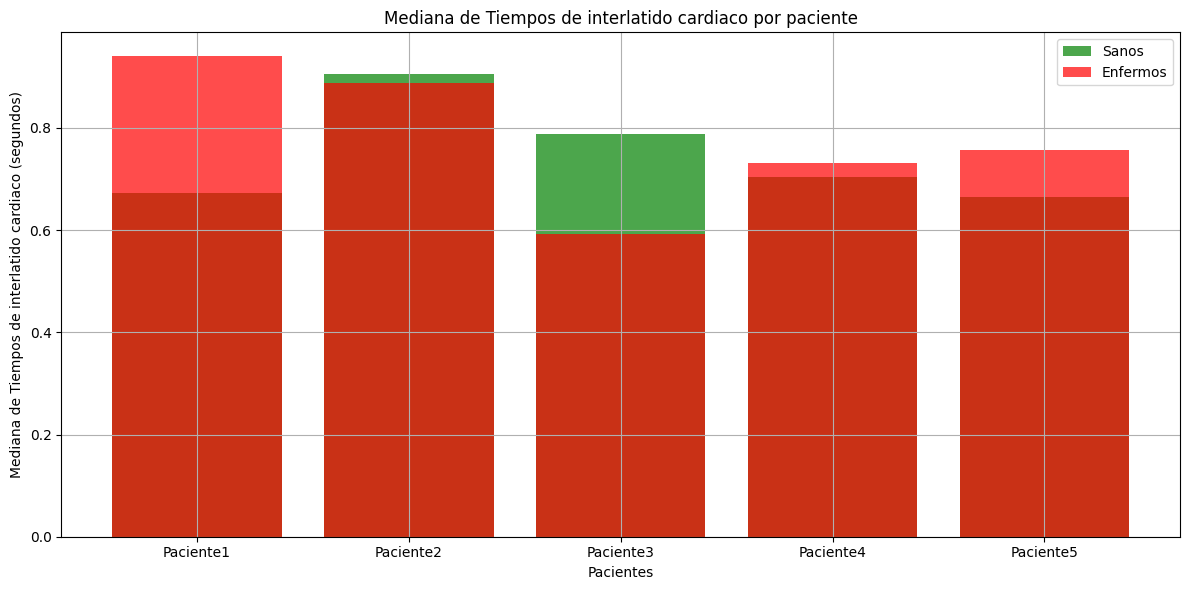

In [150]:
# Calcular la mediana de los tiempos de interlatido por paciente
mediana_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].median()
mediana_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].median()

# Graficar la mediana de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(mediana_sanos.index, mediana_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(mediana_enfermos.index, mediana_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Mediana de Tiempos de interlatido cardiaco (segundos)')
plt.title('Mediana de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Varianza

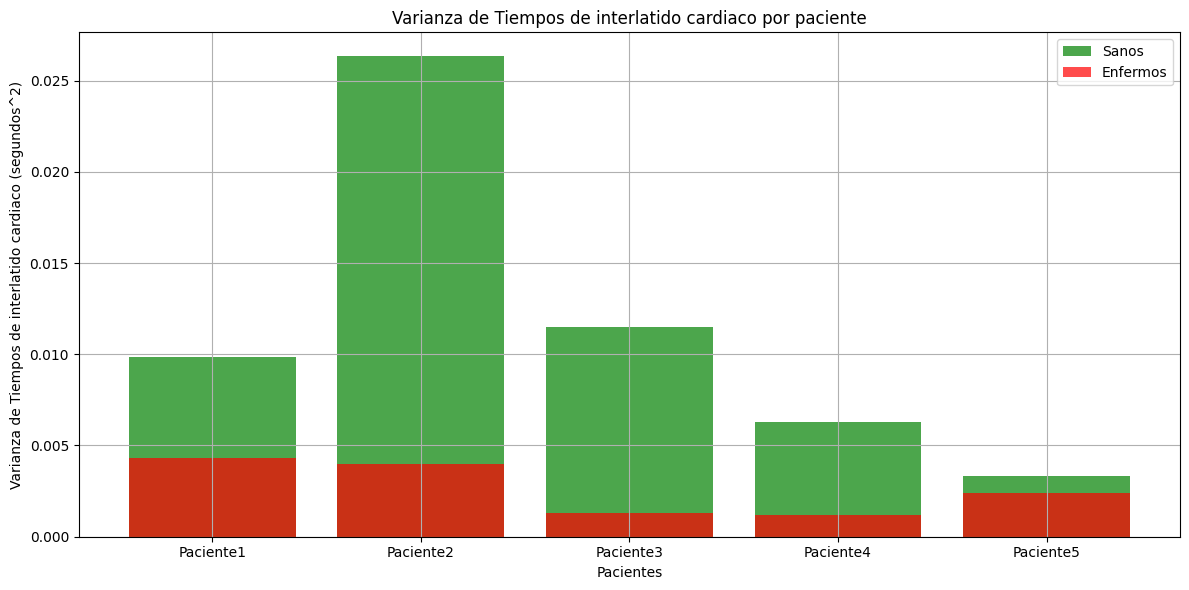

In [151]:
# Calcular la varianza de los tiempos de interlatido por paciente
varianza_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].var()
varianza_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].var()

# Graficar la varianza de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(varianza_sanos.index, varianza_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(varianza_enfermos.index, varianza_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Varianza de Tiempos de interlatido cardiaco (segundos^2)')
plt.title('Varianza de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Desviación estándar

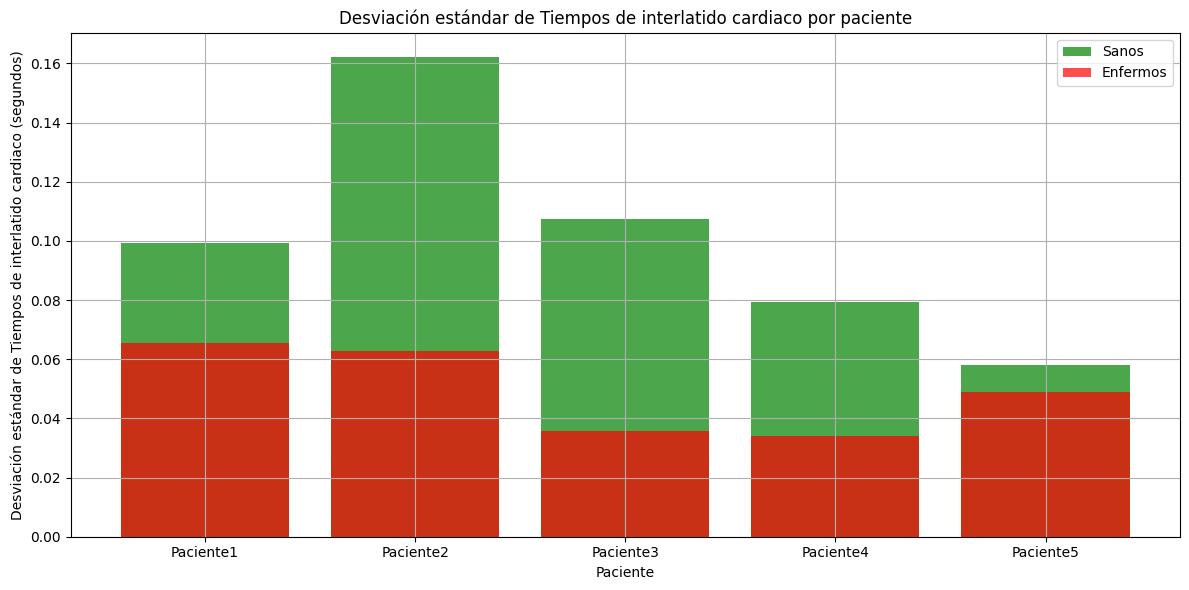

In [152]:
# Calcular la desviación estándar de los tiempos de interlatido por paciente
std_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].std()
std_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].std()

# Graficar la desviación estándar de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(std_sanos.index, std_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(std_enfermos.index, std_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Paciente')
plt.ylabel('Desviación estándar de Tiempos de interlatido cardiaco (segundos)')
plt.title('Desviación estándar de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Moda

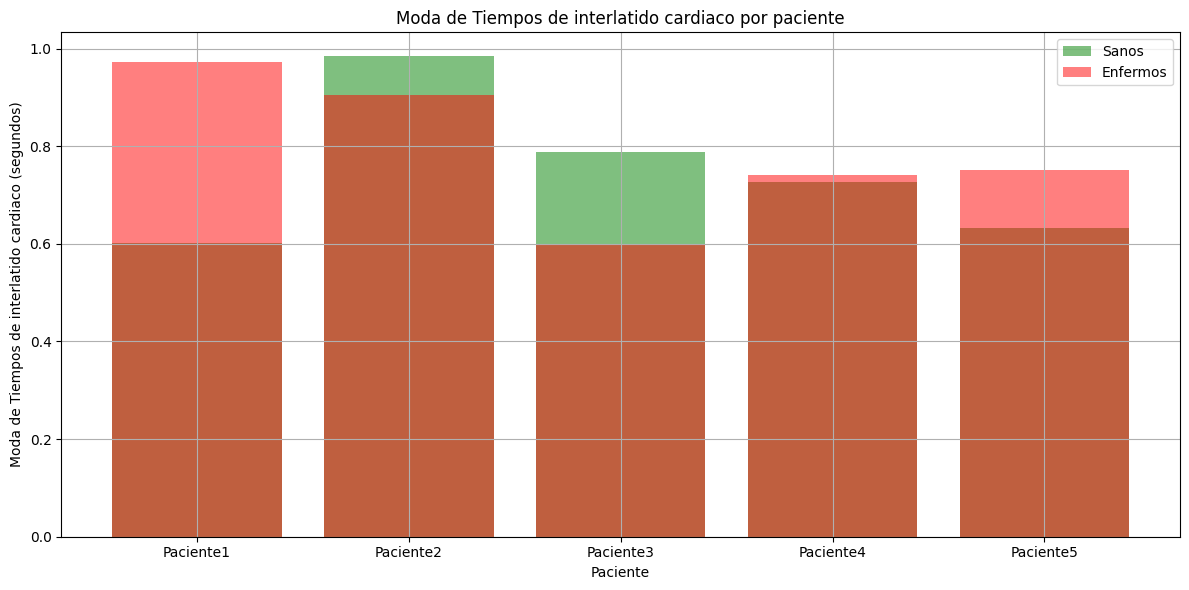

In [156]:
# Calcular la moda de los tiempos de interlatido por paciente
moda_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
moda_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Graficar la moda de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(moda_sanos.index, moda_sanos.values, label='Sanos', color='green', alpha=0.5)

# Gráfico de barras para pacientes enfermos
plt.bar(moda_enfermos.index, moda_enfermos.values, label='Enfermos', color='red', alpha=0.5)

plt.xlabel('Paciente')
plt.ylabel('Moda de Tiempos de interlatido cardiaco (segundos)')
plt.title('Moda de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## rango

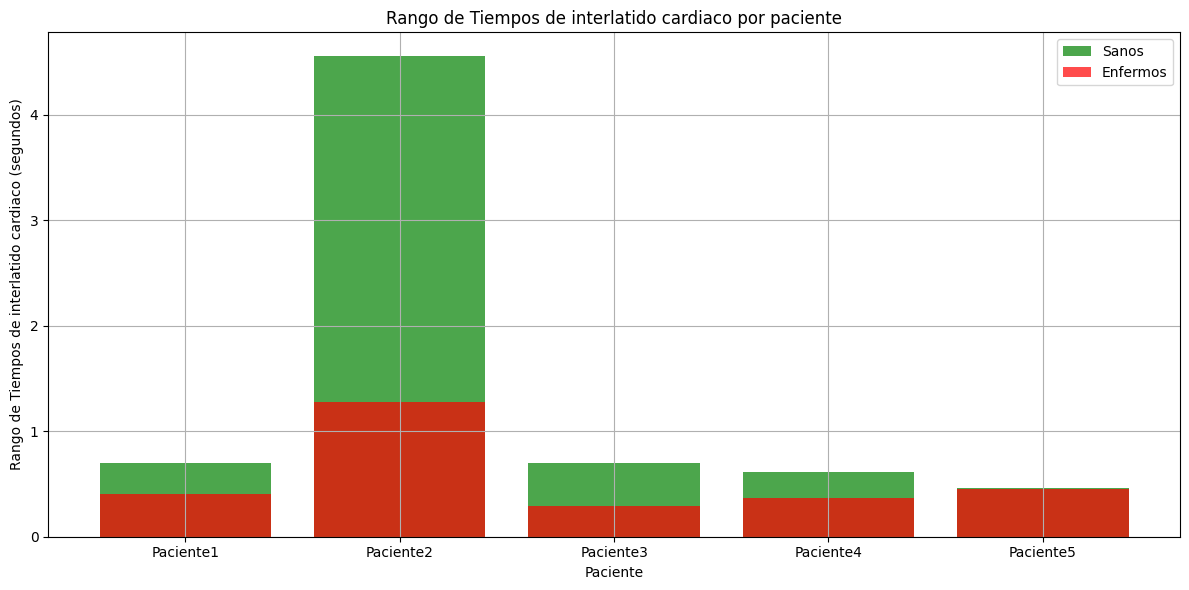

In [157]:
# Calcular el rango de los tiempos de interlatido por paciente
rango_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.max() - x.min())
rango_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.max() - x.min())

# Graficar el rango de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(rango_sanos.index, rango_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(rango_enfermos.index, rango_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Paciente')
plt.ylabel('Rango de Tiempos de interlatido cardiaco (segundos)')
plt.title('Rango de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Frecuencias

## Frecuencia absoluta

### Frecuencias absolutas de pacientes enfermos

Tabla de frecuencias absolutas de tiempos de interlatido para pacientes enfermos:
      Li     LS      MC     fe    fpe1    fpe2    fpe3    fpe4    fpe5
0  0.487  0.624  0.5555  29772   29772   29772   29772   29772   29772
1  0.624  0.759  0.6915  46777   76549   76549   76549   76549   76549
2  0.759  0.895  0.8270  34627  111176  111176  111176  111176  111176
3  0.895  1.030  0.9625  27836  139012  139012  139012  139012  139012
4  1.030  1.166  1.0980    266  139278  139278  139278  139278  139278
5  1.166  1.302  1.2340      4  139282  139282  139282  139282  139282
6  1.302  1.437  1.3695      0  139282  139282  139282  139282  139282
7  1.437  1.573  1.5050      0  139282  139282  139282  139282  139282
8  1.573  1.708  1.6405      0  139282  139282  139282  139282  139282
9  1.708  1.844  1.7760      1  139283  139283  139283  139283  139283


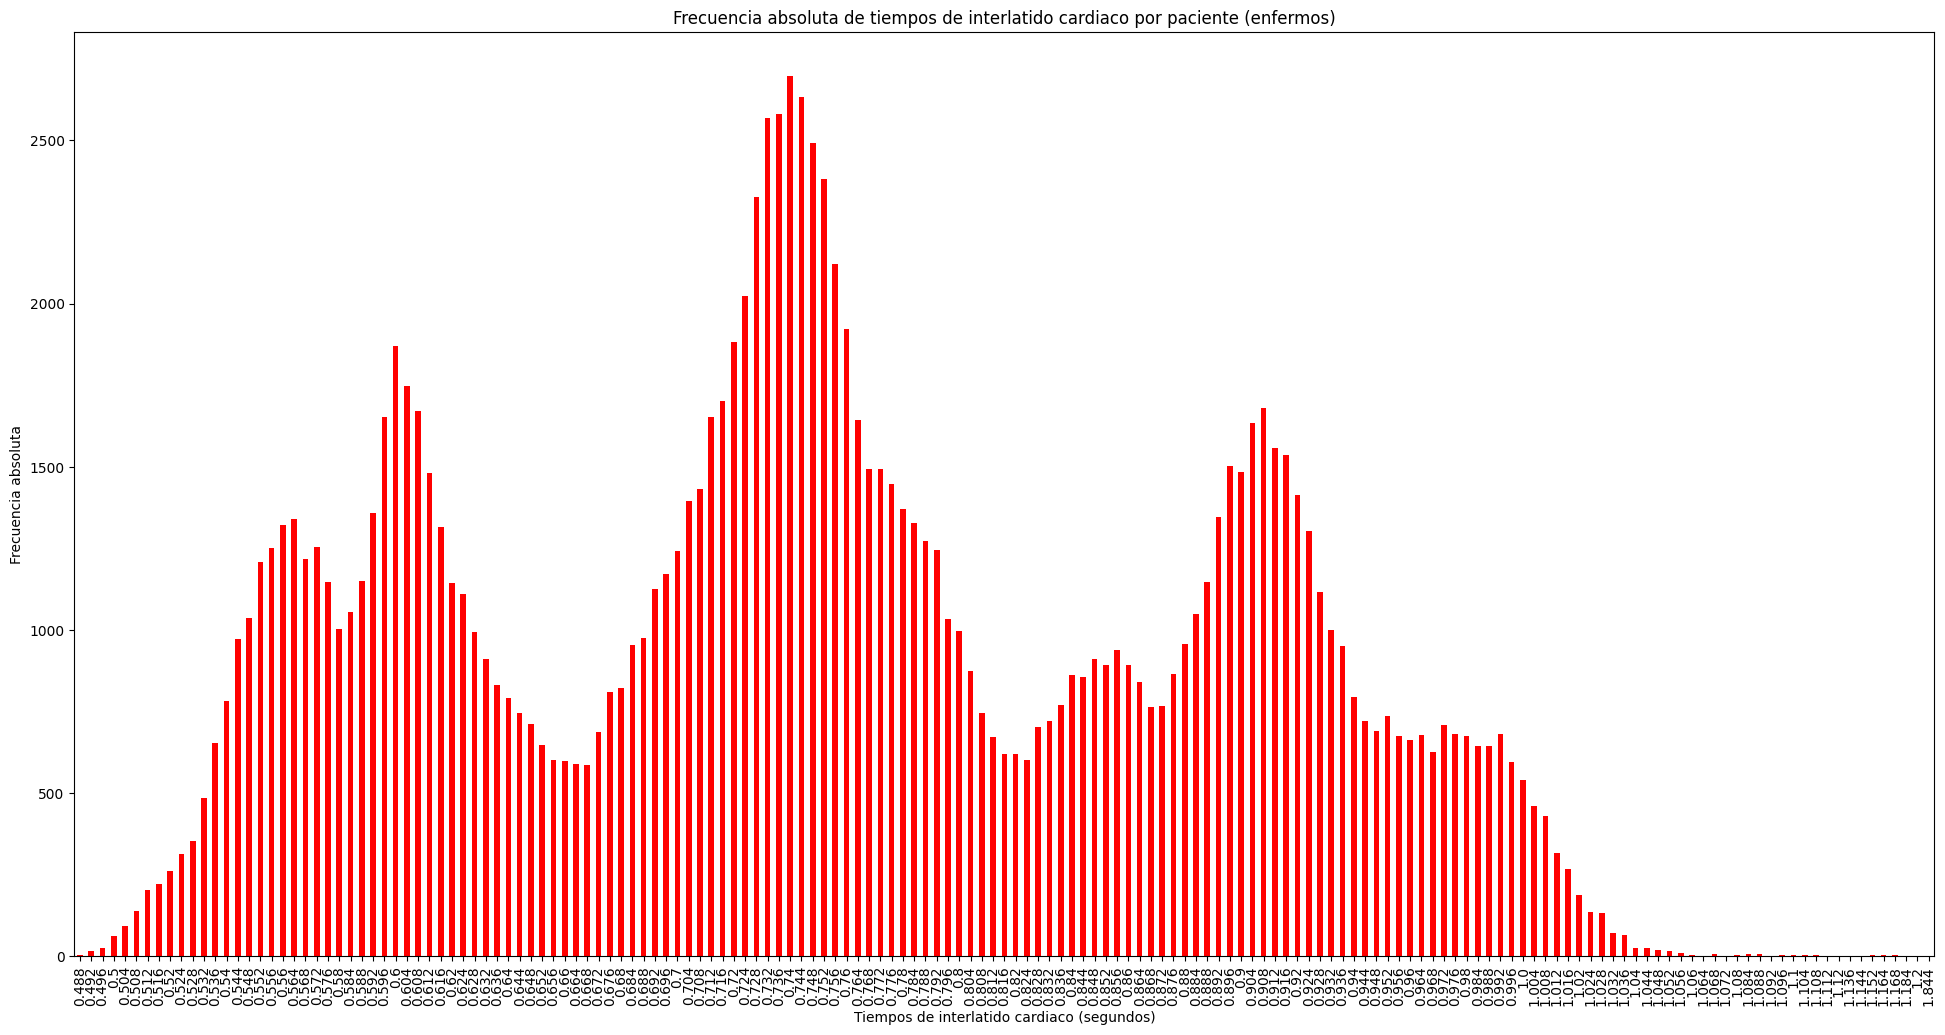

In [173]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_enfermos = df_enfermos['Tiempos de interlatido'].value_counts().sort_index()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'fe': frecuencias.values
})

# Calcular las frecuencias acumuladas (fpe1, fpe2, ...)
tabla_frecuencias['fpe1'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe2'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe3'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe4'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe5'] = tabla_frecuencias['fe'].cumsum()

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias absolutas de tiempos de interlatido para pacientes enfermos:")
print(tabla_frecuencias)

# Graficar las frecuencias absolutas
plt.figure(figsize=(24, 12))
frecuencia_enfermos.plot(kind='bar', color='red')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia absoluta de tiempos de interlatido cardiaco por paciente (enfermos)')
plt.show()

### Frecuencias absolutas de pacientes sanos

Tabla de frecuencias absolutas de tiempos de interlatido para pacientes sanos:
      Li     LS      MC      fe    fps1    fps2    fps3    fps4    fps5
0  0.386  0.856  0.6210  123011  123011  123011  123011  123011  123011
1  0.856  1.321  1.0885   21475  144486  144486  144486  144486  144486
2  1.321  1.785  1.5530      82  144568  144568  144568  144568  144568
3  1.785  2.250  2.0175      23  144591  144591  144591  144591  144591
4  2.250  2.715  2.4825       4  144595  144595  144595  144595  144595
5  2.715  3.180  2.9475       6  144601  144601  144601  144601  144601
6  3.180  3.645  3.4125       5  144606  144606  144606  144606  144606
7  3.645  4.109  3.8770       1  144607  144607  144607  144607  144607
8  4.109  4.574  4.3415       0  144607  144607  144607  144607  144607
9  4.574  5.039  4.8065       2  144609  144609  144609  144609  144609


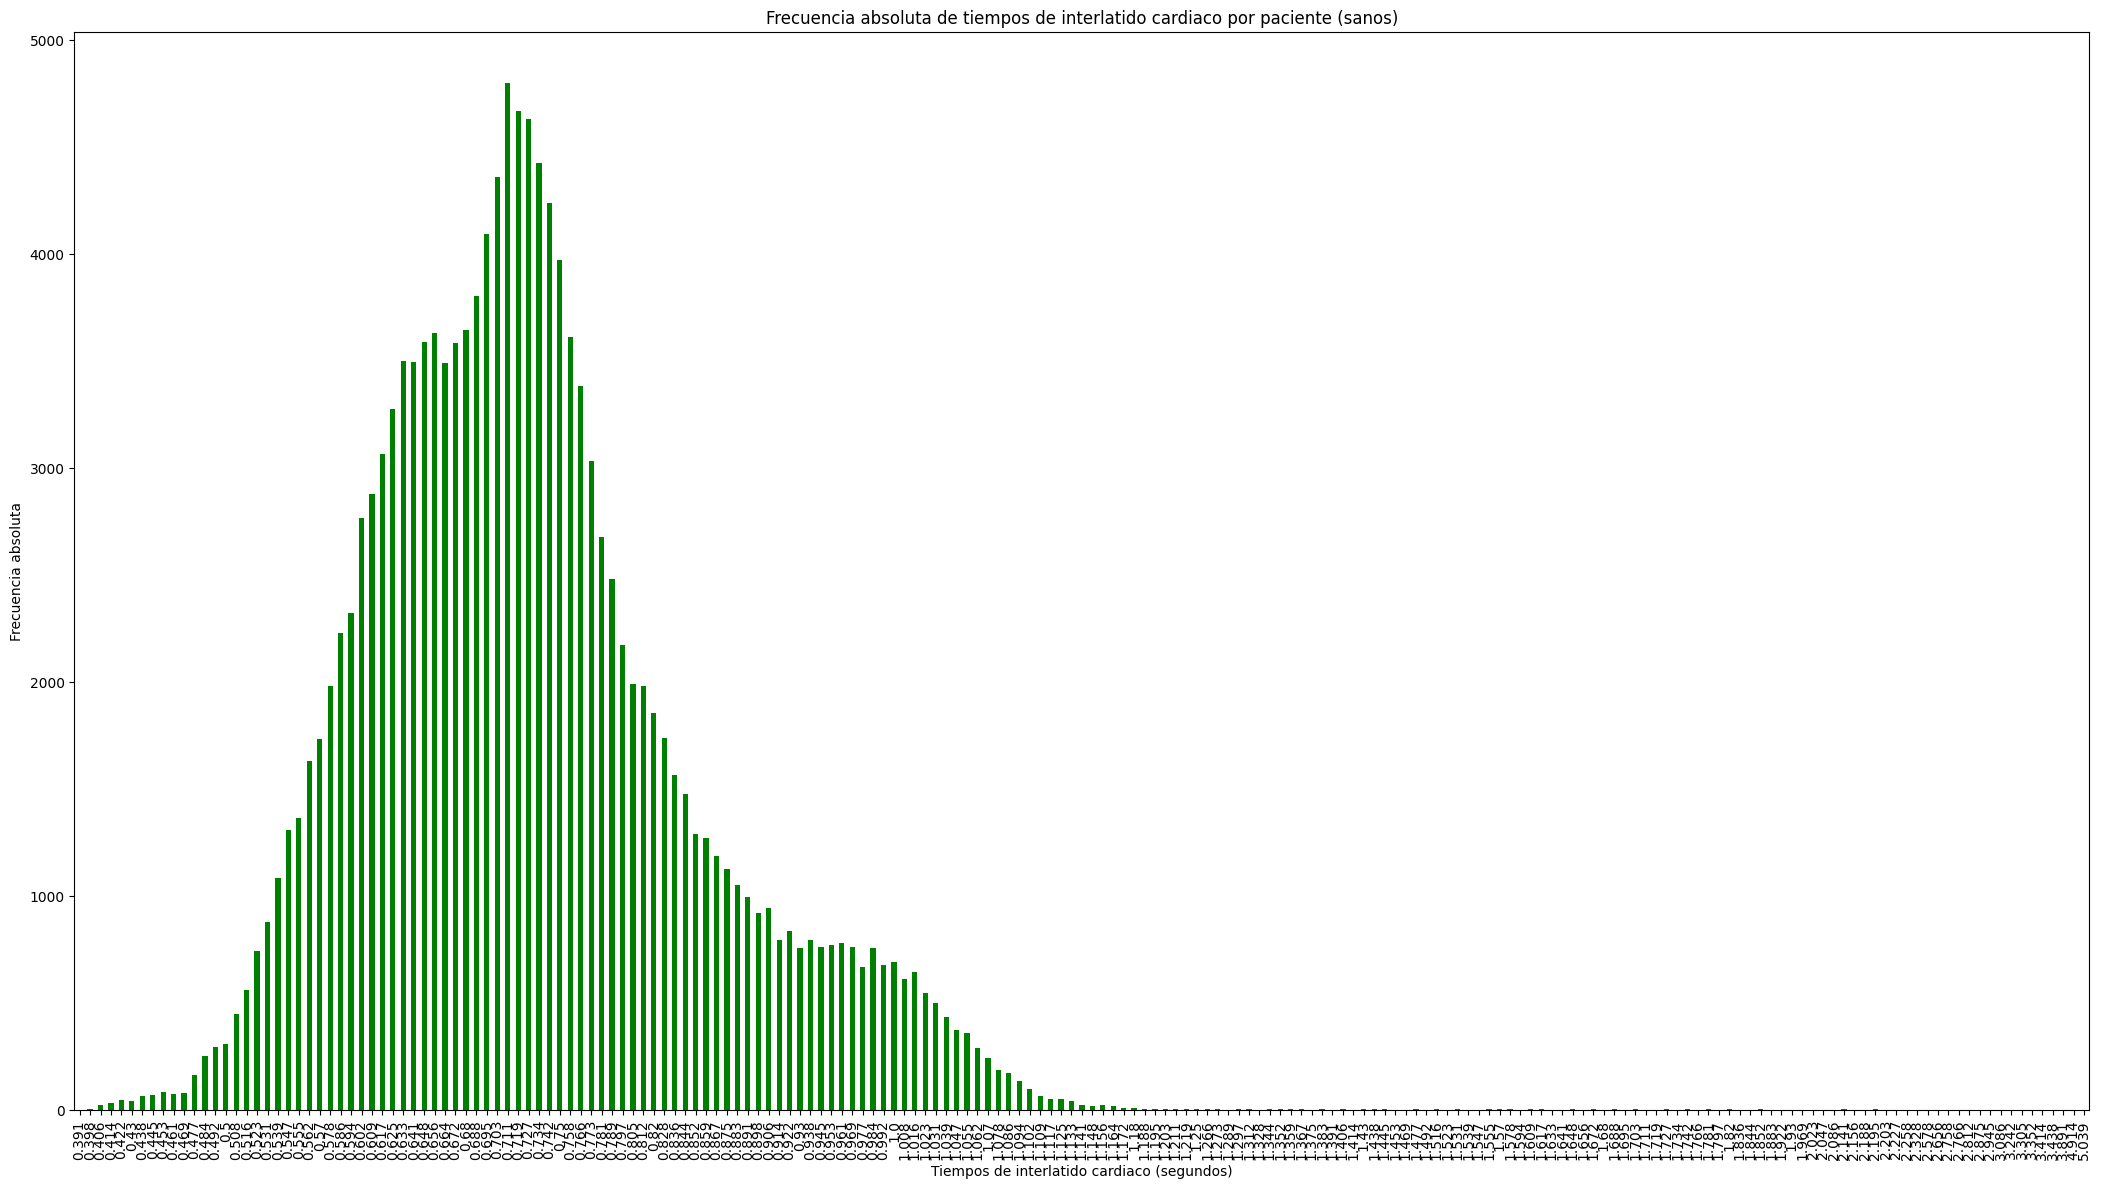

In [178]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_sanos = df_sanos['Tiempos de interlatido'].value_counts().sort_index()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_sanos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'fe': frecuencias.values
})

# Calcular las frecuencias acumuladas (fps1, fps2, ...)
tabla_frecuencias['fps1'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps2'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps3'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps4'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps5'] = tabla_frecuencias['fe'].cumsum()

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias absolutas de tiempos de interlatido para pacientes sanos:")
print(tabla_frecuencias)

# Graficar las frecuencias absolutas
plt.figure(figsize=(26, 14))
frecuencia_sanos.plot(kind='bar', color='green')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia absoluta de tiempos de interlatido cardiaco por paciente (sanos)')
plt.show()

### Frecuencia absoluta por grupo

Tabla de frecuencias absolutas de tiempos de interlatido por grupo:
       Li      LS      MC     f_s     f_e     f_t
0  0.3910  0.8558  0.6234  123010  101624  224634
1  0.8558  1.3206  1.0882   21475   37658   59133
2  1.3206  1.7854  1.5530      82       0      82
3  1.7854  2.2502  2.0178      23       1      24
4  2.2502  2.7150  2.4826       4       0       4
5  2.7150  3.1798  2.9474       6       0       6
6  3.1798  3.6446  3.4122       5       0       5
7  3.6446  4.1094  3.8770       1       0       1
8  4.1094  4.5742  4.3418       0       0       0
9  4.5742  5.0390  4.8066       2       0       2


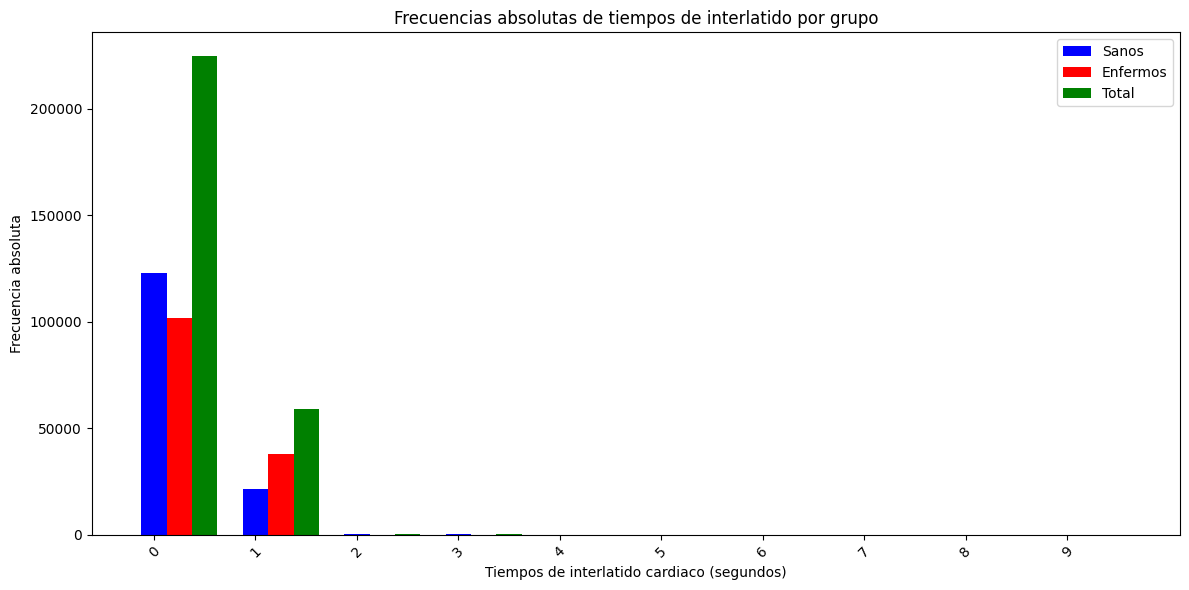

In [207]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_sanos['Tiempos de interlatido'].min(), 
                               end=df_sanos['Tiempos de interlatido'].max(), 
                               freq=(df_sanos['Tiempos de interlatido'].max() - df_sanos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular la frecuencia total
frecuencia_total = frecuencias_absolutas_sanos + frecuencias_absolutas_enfermos

# Crear DataFrame para las frecuencias absolutas por grupos
tabla_frecuencias_abs = pd.DataFrame({
    'Li': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [(interval.left + interval.right) / 2 for interval in intervalos],
    'f_s': frecuencias_absolutas_sanos.values,
    'f_e': frecuencias_absolutas_enfermos.values,
    'f_t': frecuencia_total.values,
})

# Imprimir la tabla de frecuencias absolutas por grupos
print("Tabla de frecuencias absolutas de tiempos de interlatido por grupo:")
print(tabla_frecuencias_abs)

# Graficar las frecuencias absolutas por grupos
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs.index, tabla_frecuencias_abs['f_s'], width=0.25, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.25, tabla_frecuencias_abs['f_e'], width=0.25, label='Enfermos', color='red', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.5, tabla_frecuencias_abs['f_t'], width=0.25, label='Total', color='green', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencias absolutas de tiempos de interlatido por grupo')
plt.legend()
plt.xticks(range(len(tabla_frecuencias_abs)), tabla_frecuencias_abs.index, rotation=45)
plt.tight_layout()
plt.show()

## Frecuencia Relativa

### Frecuencias relativas de pacientes sanos

Tabla de frecuencias relativas de tiempos de interlatido para pacientes sanos:
      Li     LS      MC       f_e     f_pe1     f_pe2     f_pe3     f_pe4  \
0  0.386  0.856  0.6210  0.850646  0.850646  0.850646  0.850646  0.850646   
1  0.856  1.321  1.0885  0.148504  0.999149  0.999149  0.999149  0.999149   
2  1.321  1.785  1.5530  0.000567  0.999716  0.999716  0.999716  0.999716   
3  1.785  2.250  2.0175  0.000159  0.999876  0.999876  0.999876  0.999876   
4  2.250  2.715  2.4825  0.000028  0.999903  0.999903  0.999903  0.999903   
5  2.715  3.180  2.9475  0.000041  0.999945  0.999945  0.999945  0.999945   
6  3.180  3.645  3.4125  0.000035  0.999979  0.999979  0.999979  0.999979   
7  3.645  4.109  3.8770  0.000007  0.999986  0.999986  0.999986  0.999986   
8  4.109  4.574  4.3415  0.000000  0.999986  0.999986  0.999986  0.999986   
9  4.574  5.039  4.8065  0.000014  1.000000  1.000000  1.000000  1.000000   

      f_pe5  
0  0.850646  
1  0.999149  
2  0.999716  
3  0.999876  
4  

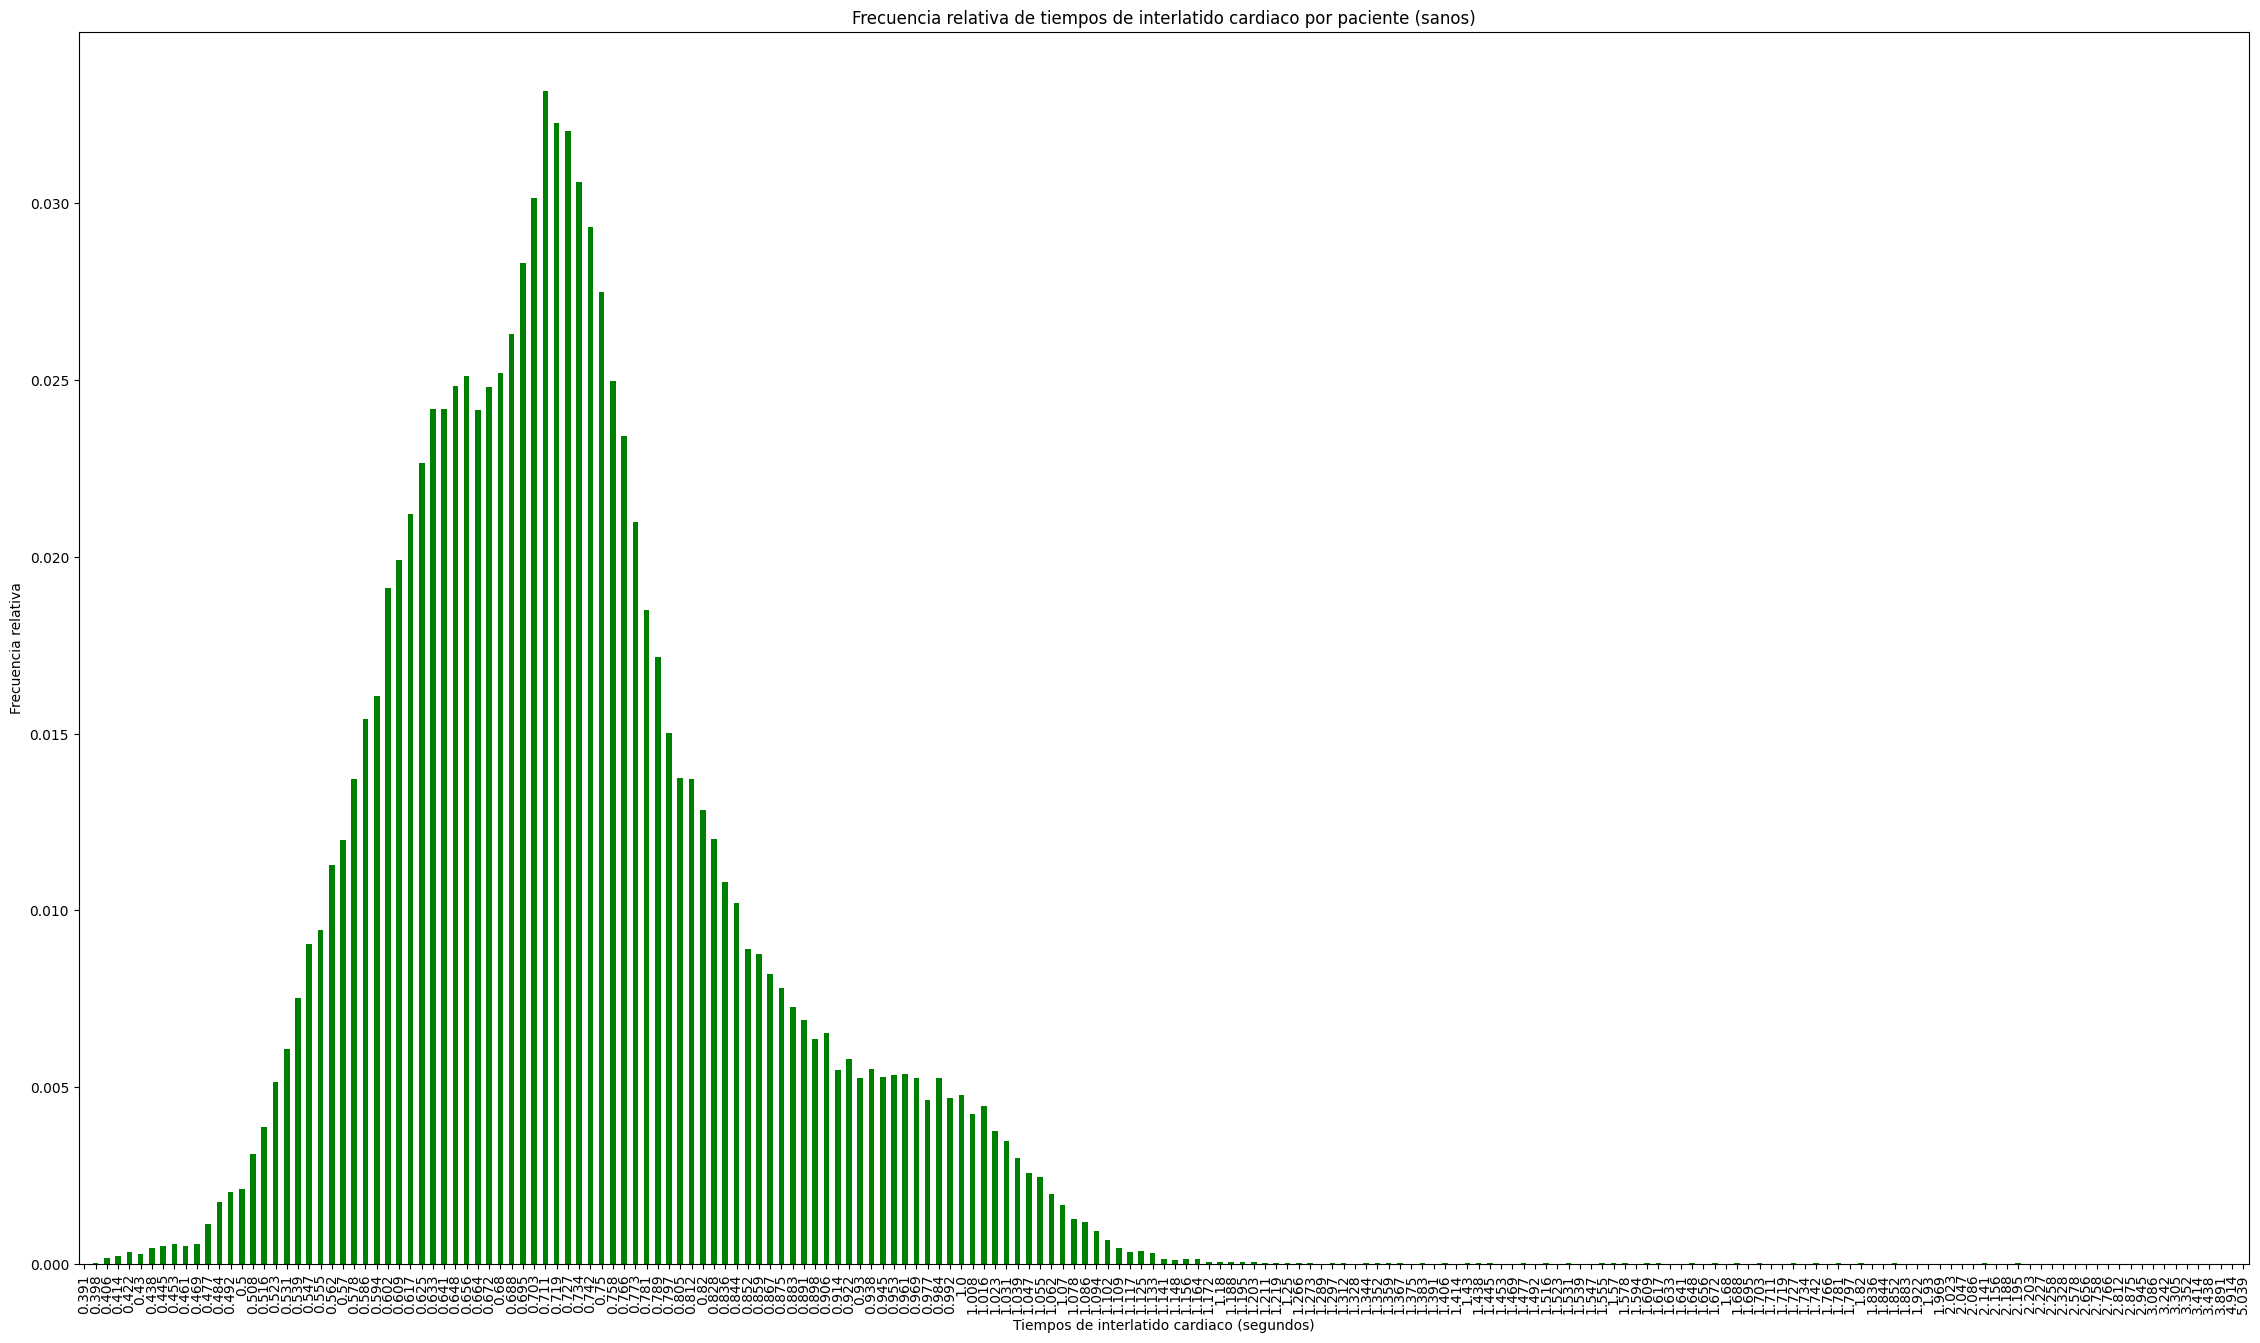

In [191]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_absoluta_sanos = df_sanos['Tiempos de interlatido'].value_counts().sort_index()
# Calcular las frecuencias relativas
frecuencia_relativa_sanos = frecuencia_absoluta_sanos / frecuencia_absoluta_sanos.sum()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_sanos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias_relativas = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'f_e': frecuencias.values / frecuencias.values.sum()
})

# Calcular las frecuencias acumuladas relativas (f_pe1, f_pe2, ...)
tabla_frecuencias_relativas['f_pe1'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe2'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe3'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe4'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe5'] = tabla_frecuencias_relativas['f_e'].cumsum()

# Imprimir la tabla de frecuencias relativas
print("Tabla de frecuencias relativas de tiempos de interlatido para pacientes sanos:")
print(tabla_frecuencias_relativas)

# Graficar las frecuencias relativas
plt.figure(figsize=(28, 16))
frecuencia_relativa_sanos.plot(kind='bar', color='green')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencia relativa de tiempos de interlatido cardiaco por paciente (sanos)')
plt.show()

### Frecuencias relativas de pacientes enefermos

Tabla de frecuencias relativas de tiempos de interlatido para pacientes enfermos:
      Li     LS      MC        fs      fps1      fps2      fps3      fps4  \
0  0.487  0.624  0.5555  0.213752  0.213752  0.213752  0.213752  0.213752   
1  0.624  0.759  0.6915  0.335841  0.549593  0.549593  0.549593  0.549593   
2  0.759  0.895  0.8270  0.248609  0.798202  0.798202  0.798202  0.798202   
3  0.895  1.030  0.9625  0.199852  0.998054  0.998054  0.998054  0.998054   
4  1.030  1.166  1.0980  0.001910  0.999964  0.999964  0.999964  0.999964   
5  1.166  1.302  1.2340  0.000029  0.999993  0.999993  0.999993  0.999993   
6  1.302  1.437  1.3695  0.000000  0.999993  0.999993  0.999993  0.999993   
7  1.437  1.573  1.5050  0.000000  0.999993  0.999993  0.999993  0.999993   
8  1.573  1.708  1.6405  0.000000  0.999993  0.999993  0.999993  0.999993   
9  1.708  1.844  1.7760  0.000007  1.000000  1.000000  1.000000  1.000000   

       fps5  
0  0.213752  
1  0.549593  
2  0.798202  
3  0.998054  


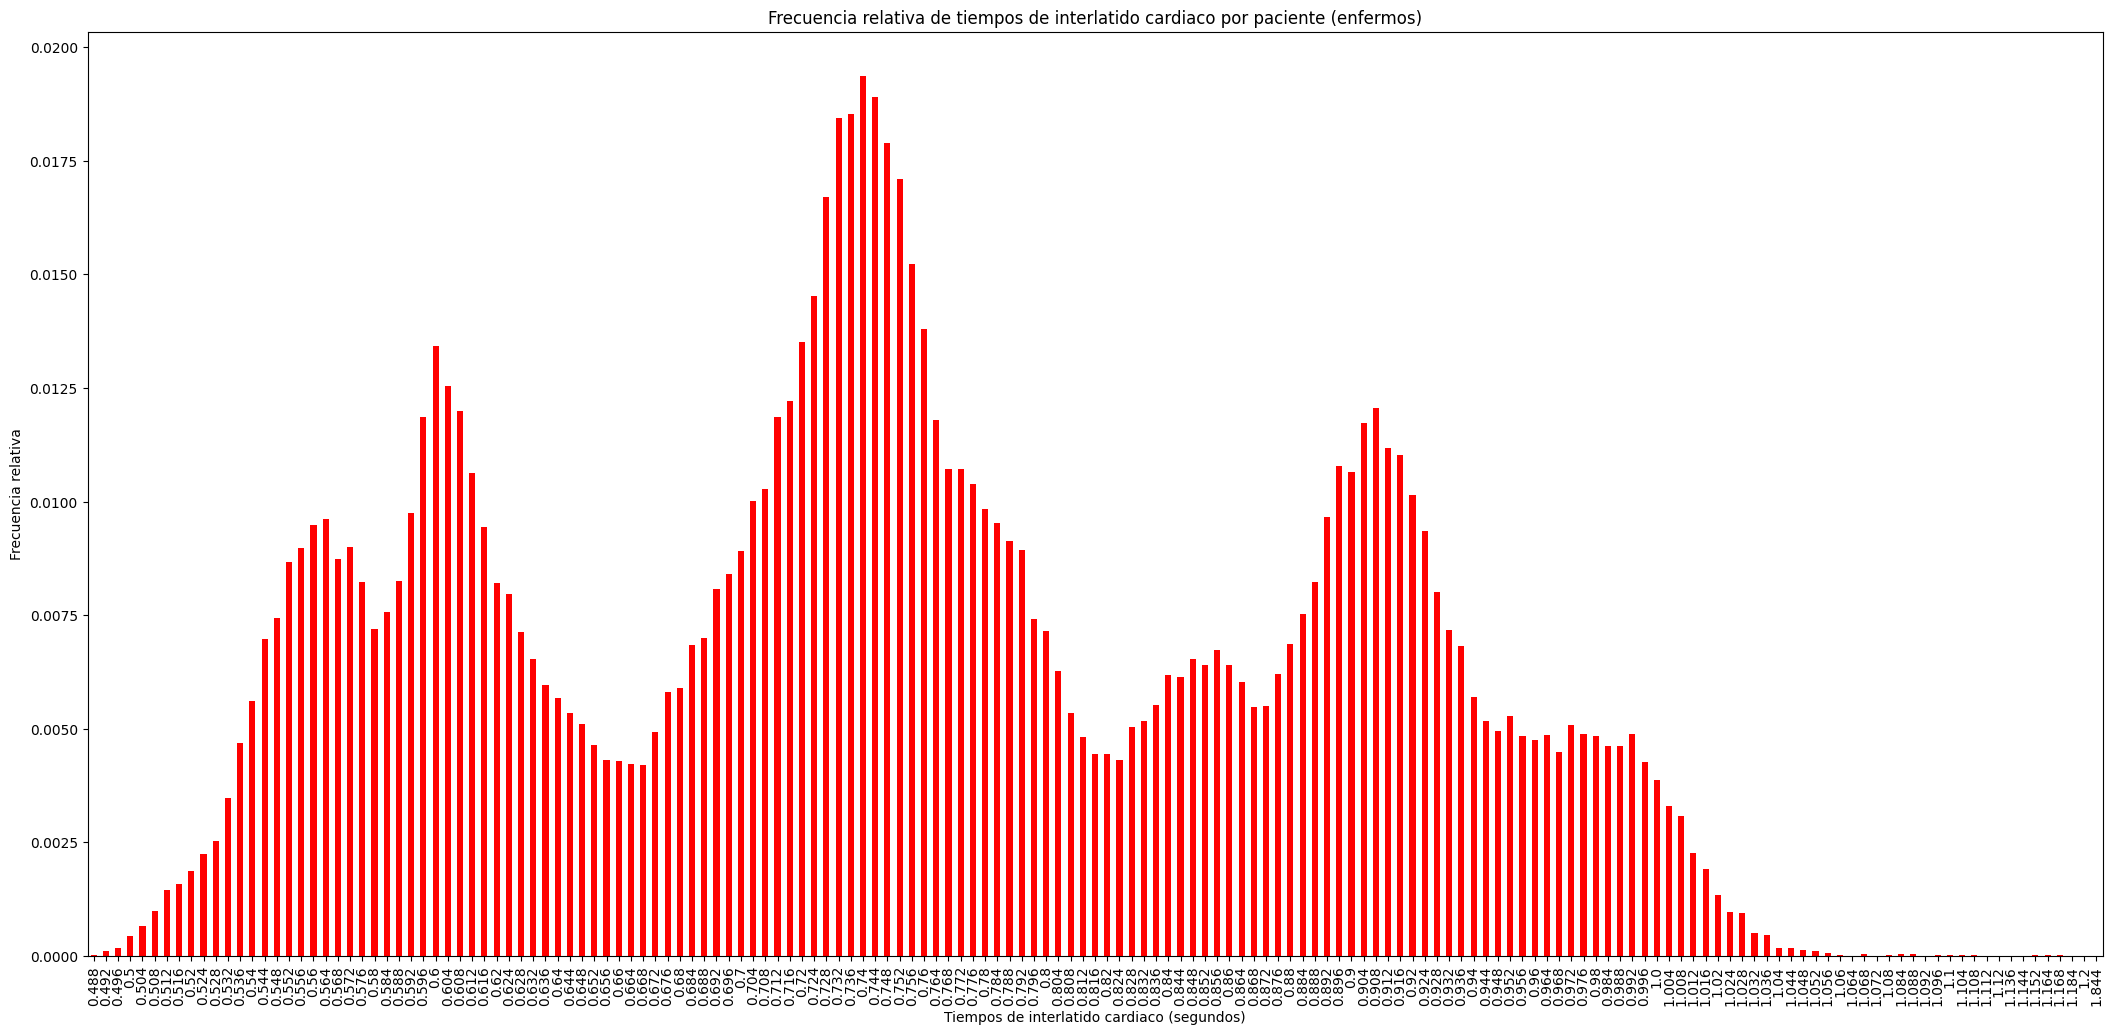

In [192]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_absoluta_enfermos = df_enfermos['Tiempos de interlatido'].value_counts().sort_index()

# Calcular las frecuencias relativas
frecuencia_relativa_enfermos = frecuencia_absoluta_enfermos / frecuencia_absoluta_enfermos.sum()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias_relativas = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'fs': frecuencias.values / frecuencias.values.sum()
})

# Calcular las frecuencias acumuladas relativas (fps1, fps2, ...)
tabla_frecuencias_relativas['fps1'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps2'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps3'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps4'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps5'] = tabla_frecuencias_relativas['fs'].cumsum()

# Imprimir la tabla de frecuencias relativas
print("Tabla de frecuencias relativas de tiempos de interlatido para pacientes enfermos:")
print(tabla_frecuencias_relativas)

# Graficar las frecuencias relativas
plt.figure(figsize=(26, 12))
frecuencia_relativa_enfermos.plot(kind='bar', color='red')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencia relativa de tiempos de interlatido cardiaco por paciente (enfermos)')
plt.show()

### Frecuencias relativas por grupos

Tabla de frecuencias relativas de tiempos de interlatido por grupo:
    Li   LS    MC        fs        fe
0  0.4  0.9  0.65  0.850646  0.213752
1  0.9  1.3  1.10  0.148504  0.335841
2  1.3  1.8  1.55  0.000567  0.248609
3  1.8  2.3  2.05  0.000159  0.199852
4  2.3  2.7  2.50  0.000028  0.001910
5  2.7  3.2  2.95  0.000041  0.000029
6  3.2  3.6  3.40  0.000035  0.000000
7  3.6  4.1  3.85  0.000007  0.000000
8  4.1  4.6  4.35  0.000000  0.000000
9  4.6  5.0  4.80  0.000014  0.000007


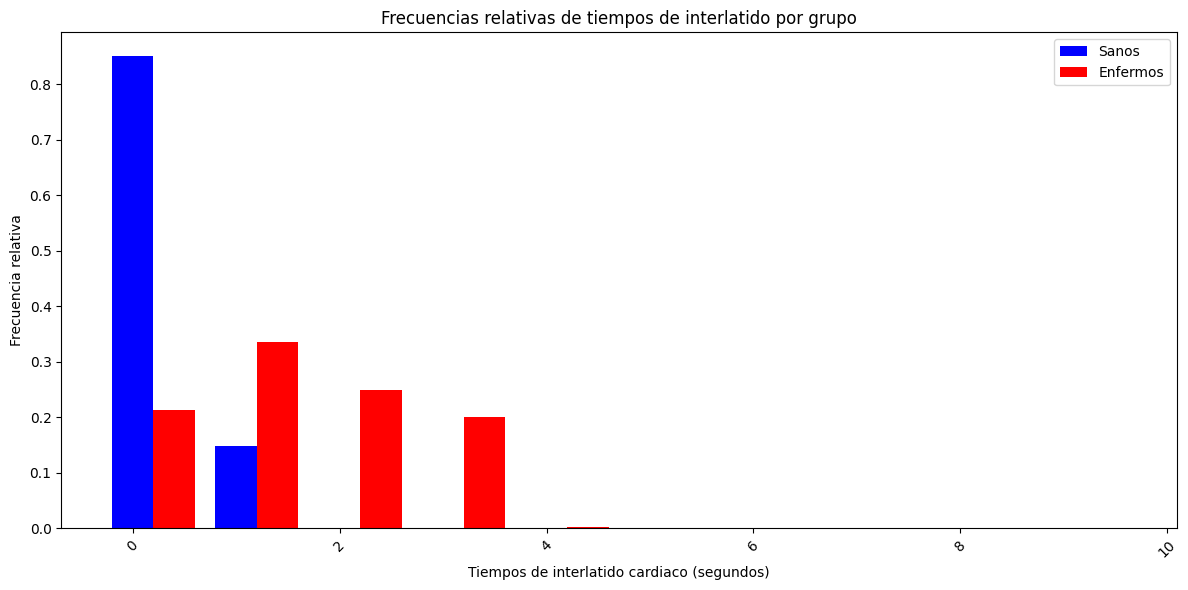

In [203]:
# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=10, precision=0)
intervalos_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=10, precision=0)

# Calcular las frecuencias absolutas para sanos y enfermos
frecuencias_absolutas_sanos = intervalos_sanos.value_counts().sort_index()
frecuencias_absolutas_enfermos = intervalos_enfermos.value_counts().sort_index()

# Calcular las frecuencias relativas para sanos y enfermos
frecuencias_relativas_sanos = frecuencias_absolutas_sanos / frecuencias_absolutas_sanos.sum()
frecuencias_relativas_enfermos = frecuencias_absolutas_enfermos / frecuencias_absolutas_enfermos.sum()

# Crear DataFrame para las frecuencias relativas por grupos
tabla_frecuencias_rel = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias_absolutas_sanos.index],
    'LS': [interval.right for interval in frecuencias_absolutas_sanos.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias_absolutas_sanos.index],
    'fs': frecuencias_relativas_sanos.values,
    'fe': frecuencias_relativas_enfermos.values,
})

# Imprimir la tabla de frecuencias relativas por grupos
print("Tabla de frecuencias relativas de tiempos de interlatido por grupo:")
print(tabla_frecuencias_rel)

# Graficar las frecuencias relativas por grupos
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_rel.index, tabla_frecuencias_rel['fs'], width=0.4, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_rel.index + 0.4, tabla_frecuencias_rel['fe'], width=0.4, label='Enfermos', color='red', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencias relativas de tiempos de interlatido por grupo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Marcas de Clase

Tabla de frecuencias absolutas de tiempos de interlatido por grupo con marcas de clase:
       LI      LS     LRI     LRS      MC     f_s     f_e     f_t
0  0.3910  0.8558 -0.1090  1.3558  0.6234  123010  101624  224634
1  0.8558  1.3206  0.3558  1.8206  1.0882   21475   37658   59133
2  1.3206  1.7854  0.8206  2.2854  1.5530      82       0      82
3  1.7854  2.2502  1.2854  2.7502  2.0178      23       1      24
4  2.2502  2.7150  1.7502  3.2150  2.4826       4       0       4
5  2.7150  3.1798  2.2150  3.6798  2.9474       6       0       6
6  3.1798  3.6446  2.6798  4.1446  3.4122       5       0       5
7  3.6446  4.1094  3.1446  4.6094  3.8770       1       0       1
8  4.1094  4.5742  3.6094  5.0742  4.3418       0       0       0
9  4.5742  5.0390  4.0742  5.5390  4.8066       2       0       2


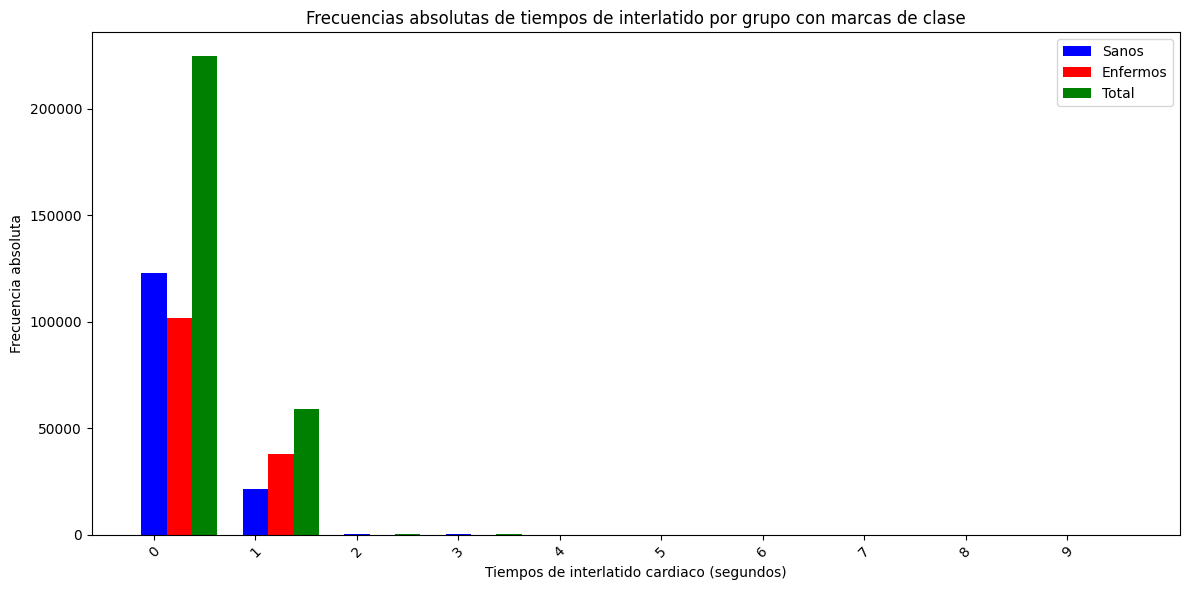

In [208]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_sanos['Tiempos de interlatido'].min(), 
                               end=df_sanos['Tiempos de interlatido'].max(), 
                               freq=(df_sanos['Tiempos de interlatido'].max() - df_sanos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular la frecuencia total
frecuencia_total = frecuencias_absolutas_sanos + frecuencias_absolutas_enfermos

# Calcular marcas de clase, límites reales inferiores (LRI) y límites reales superiores (LRS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]
LRI = [interval.left - 0.5 for interval in intervalos]
LRS = [interval.right + 0.5 for interval in intervalos]

# Crear DataFrame para las frecuencias absolutas por grupos
tabla_frecuencias_abs = pd.DataFrame({
    'LI': LI,
    'LS': LS,
    'LRI': LRI,
    'LRS': LRS,
    'MC': MC,
    'f_s': frecuencias_absolutas_sanos.values,
    'f_e': frecuencias_absolutas_enfermos.values,
    'f_t': frecuencia_total.values,
})

# Imprimir la tabla de frecuencias absolutas por grupos con marcas de clase
print("Tabla de frecuencias absolutas de tiempos de interlatido por grupo con marcas de clase:")
print(tabla_frecuencias_abs)

# Graficar las frecuencias absolutas por grupos con marcas de clase
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs.index, tabla_frecuencias_abs['f_s'], width=0.25, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.25, tabla_frecuencias_abs['f_e'], width=0.25, label='Enfermos', color='red', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.5, tabla_frecuencias_abs['f_t'], width=0.25, label='Total', color='green', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencias absolutas de tiempos de interlatido por grupo con marcas de clase')
plt.legend()
plt.xticks(range(len(tabla_frecuencias_abs)), tabla_frecuencias_abs.index, rotation=45)
plt.tight_layout()
plt.show()

# Histrograma de frecuencias absolutas

## FRECUENCIAS ABSOLUTAS DE LOS INTERVALOS DE INTERLATIDO (100MS) DE LOS PACIENTES ENFERMOS

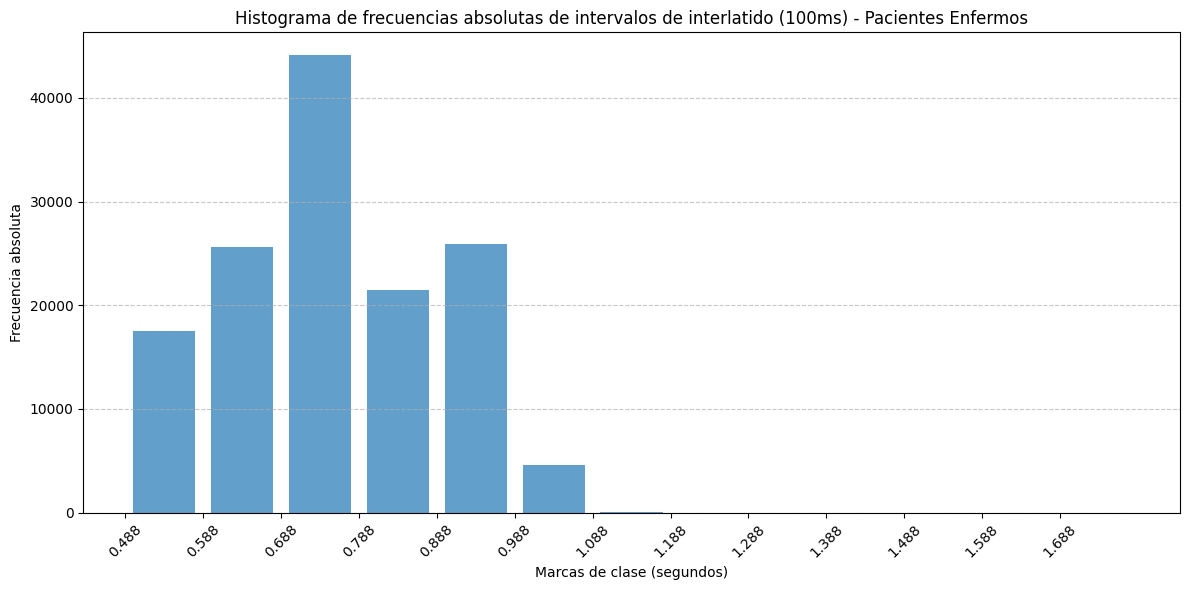

In [210]:
# Definir intervalos de clase basados en los datos reales (100ms)
intervalos = pd.interval_range(start=df_enfermos['Tiempos de interlatido'].min(), 
                               end=df_enfermos['Tiempos de interlatido'].max(), 
                               freq=0.1)

# Calcular las frecuencias absolutas para pacientes enfermos usando los mismos intervalos
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Obtener marcas de clase y límites de clase
marcas_clase = [(interval.left + interval.right) / 2 for interval in intervalos]
limites_clase = [interval.left for interval in intervalos]

# Graficar el histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(marcas_clase, frecuencias_absolutas_enfermos.values, width=0.08, align='center', alpha=0.7)
plt.xlabel('Marcas de clase (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma de frecuencias absolutas de intervalos de interlatido (100ms) - Pacientes Enfermos')
plt.xticks(limites_clase, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Paciente 1

Datos del paciente N°1:
         Paciente  Tiempos de interlatido
0       Paciente1                   0.828
5       Paciente1                   0.804
10      Paciente1                   0.828
15      Paciente1                   0.824
20      Paciente1                   0.800
...           ...                     ...
115365  Paciente1                   0.924
115370  Paciente1                   0.916
115375  Paciente1                   0.936
115380  Paciente1                   0.936
115385  Paciente1                   0.928

[23078 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°1:
    LI   LS    MC  Frecuencia Absoluta
0  0.7  0.8  0.75                 1283
1  0.8  0.9  0.85                 4798
2  0.9  1.0  0.95                14352
3  1.0  1.1  1.05                 2641


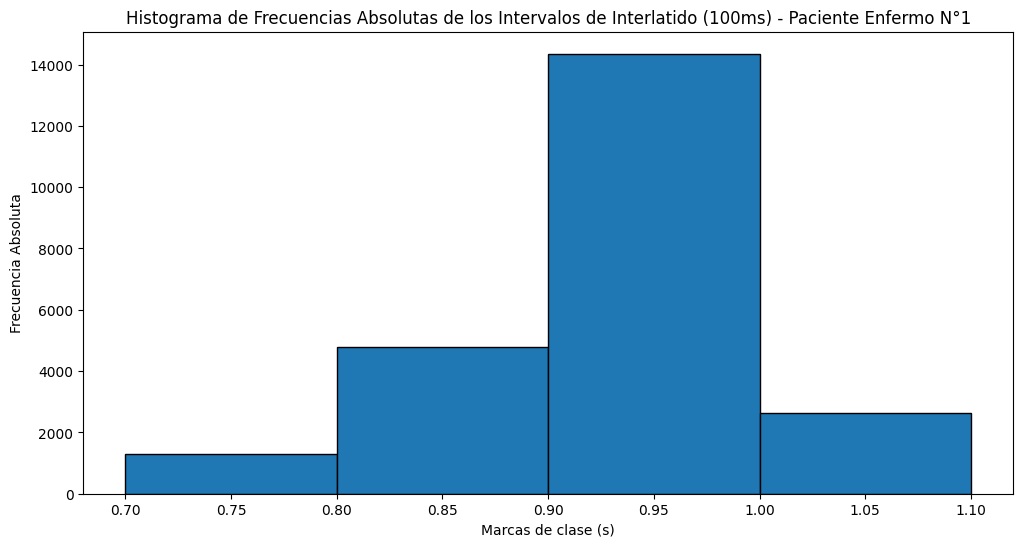

In [218]:
# Filtrar datos del paciente "Paciente1"
df_paciente_1 = df_enfermos[df_enfermos['Paciente'] == 'Paciente1']

print("Datos del paciente N°1:")
print(df_paciente_1)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_1['Tiempos de interlatido'].min()
max_val = df_paciente_1['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_1['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°1:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°1')
plt.show()


### Paciente 2

Datos del paciente N°2:
         Paciente  Tiempos de interlatido
1       Paciente2                   0.864
6       Paciente2                   0.836
11      Paciente2                   0.864
16      Paciente2                   0.852
21      Paciente2                   0.848
...           ...                     ...
117518  Paciente2                   0.756
117522  Paciente2                   0.772
117526  Paciente2                   0.760
117530  Paciente2                   0.760
117534  Paciente2                   0.768

[23615 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°2:
       LI     LS     MC  Frecuencia Absoluta
0   0.568  0.668  0.618                   76
1   0.668  0.768  0.718                 2218
2   0.768  0.868  0.818                 5673
3   0.868  0.968  0.918                15356
4   0.968  1.068  1.018                  259
5   1.068  1.168  1.118                   27
6   1.168  1.268  1.218     

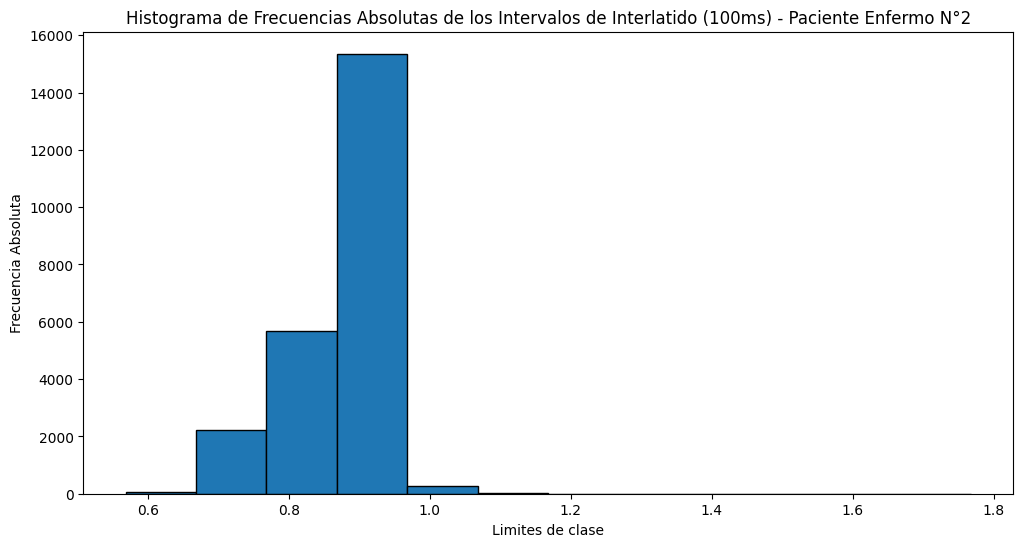

In [225]:
# Filtrar datos del paciente "Paciente2"
df_paciente_2 = df_enfermos[df_enfermos['Paciente'] == 'Paciente2']

print("Datos del paciente N°2:")
print(df_paciente_2)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_2['Tiempos de interlatido'].min()
max_val = df_paciente_2['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_2['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°2:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°2')
plt.show()


### Paciente 3

Datos del paciente N°3:
         Paciente  Tiempos de interlatido
2       Paciente3                   0.620
7       Paciente3                   0.628
12      Paciente3                   0.628
17      Paciente3                   0.636
22      Paciente3                   0.620
...           ...                     ...
139278  Paciente3                   0.544
139279  Paciente3                   0.532
139280  Paciente3                   0.536
139281  Paciente3                   0.536
139282  Paciente3                   0.544

[36453 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°3:
      LI     LS     MC  Frecuencia Absoluta
0  0.488  0.588  0.538                17521
1  0.588  0.688  0.638                18891
2  0.688  0.788  0.738                   37


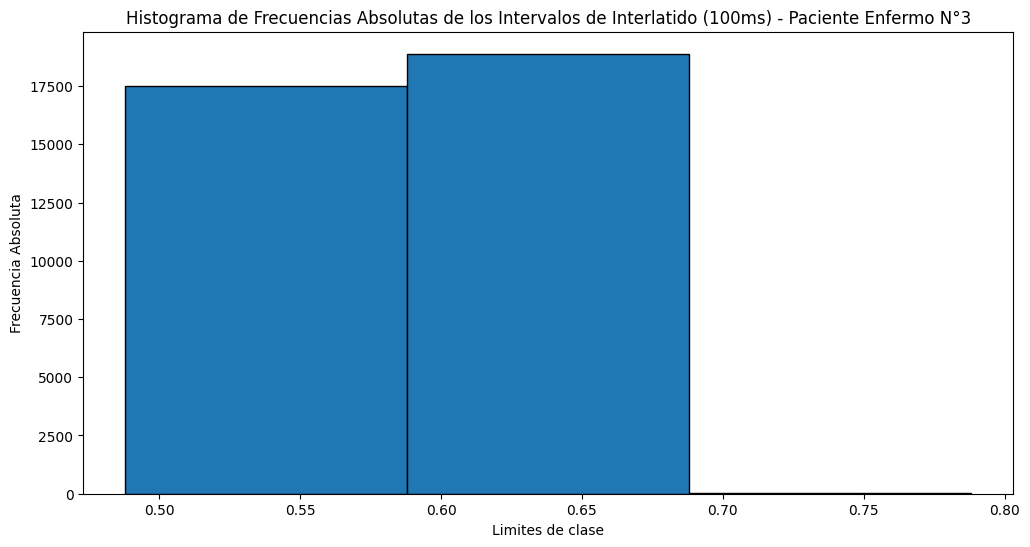

In [226]:
# Filtrar datos del paciente "Paciente2"
df_paciente_3 = df_enfermos[df_enfermos['Paciente'] == 'Paciente3']

print("Datos del paciente N°3:")
print(df_paciente_3)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_3['Tiempos de interlatido'].min()
max_val = df_paciente_3['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_3['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°3:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°3')
plt.show()


### Paciente 4

Datos del paciente N°4:
         Paciente  Tiempos de interlatido
3       Paciente4                   0.724
8       Paciente4                   0.748
13      Paciente4                   0.716
18      Paciente4                   0.724
23      Paciente4                   0.732
...           ...                     ...
131084  Paciente4                   0.644
131086  Paciente4                   0.668
131088  Paciente4                   0.656
131090  Paciente4                   0.664
131092  Paciente4                   0.656

[28263 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°4:
      LI     LS     MC  Frecuencia Absoluta
0  0.592  0.692  0.642                 4389
1  0.692  0.792  0.742                22812
2  0.792  0.892  0.842                 1055


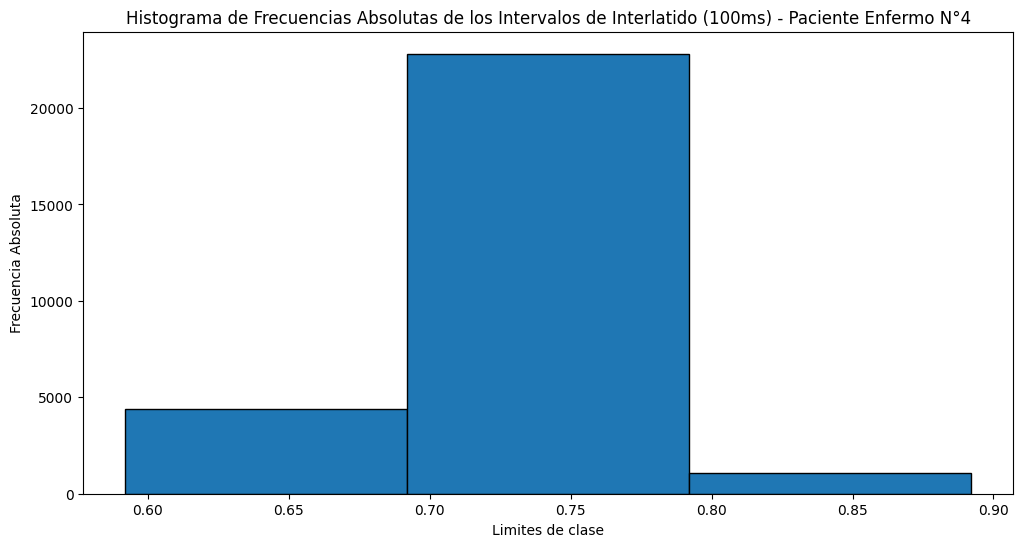

In [228]:
# Filtrar datos del paciente "Paciente4"
df_paciente_4 = df_enfermos[df_enfermos['Paciente'] == 'Paciente4']

print("Datos del paciente N°4:")
print(df_paciente_4)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_4['Tiempos de interlatido'].min()
max_val = df_paciente_4['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_4['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°4:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°4')
plt.show()


### Paciente 5

Datos del paciente N°4:
         Paciente  Tiempos de interlatido
4       Paciente5                   0.708
9       Paciente5                   0.728
14      Paciente5                   0.712
19      Paciente5                   0.712
24      Paciente5                   0.728
...           ...                     ...
130302  Paciente5                   0.716
130305  Paciente5                   0.704
130308  Paciente5                   0.700
130311  Paciente5                   0.704
130314  Paciente5                   0.708

[27874 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°4:
      LI     LS     MC  Frecuencia Absoluta
0  0.496  0.596  0.546                   18
1  0.596  0.696  0.646                 3488
2  0.696  0.796  0.746                17889
3  0.796  0.896  0.846                 6458


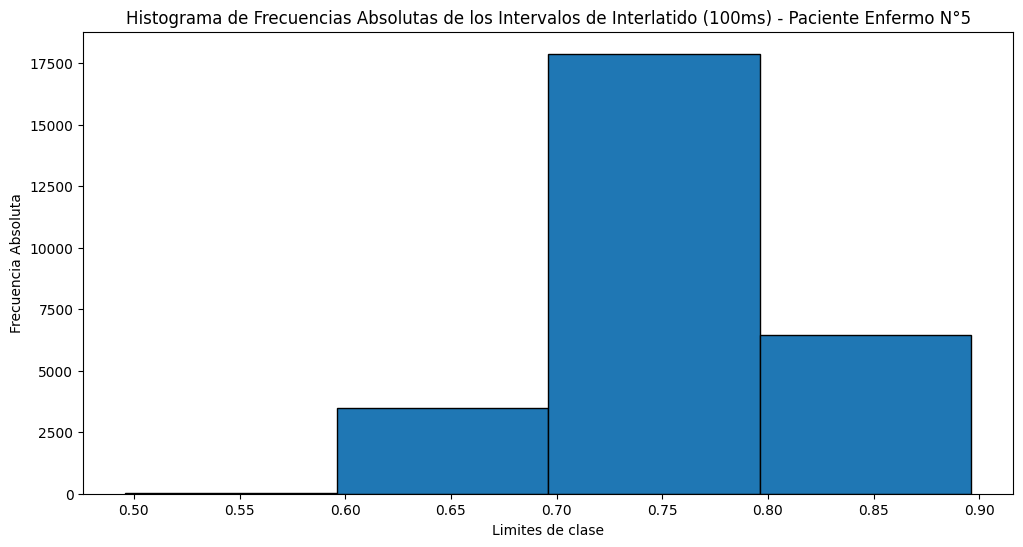

In [230]:
# Filtrar datos del paciente "Paciente 5"
df_paciente_5 = df_enfermos[df_enfermos['Paciente'] == 'Paciente5']

print("Datos del paciente N°4:")
print(df_paciente_5)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_5['Tiempos de interlatido'].min()
max_val = df_paciente_5['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_5['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°4:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°5')
plt.show()


## FRECUENCIAS ABSOLUTAS DE LOS INTERVALOS DE INTERLATIDO (100MS) DE LOS PACIENTES SANOS


Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para todos los pacientes sanos:
       LI     LS     MC  Frecuencia Absoluta
0   0.391  0.491  0.441                  932
1   0.491  0.591  0.541                14567
2   0.591  0.691  0.641                43056
3   0.691  0.791  0.741                50390
4   0.791  0.891  0.841                18700
5   0.891  0.991  0.941                10545
6   0.991  1.091  1.041                 5720
7   1.091  1.191  1.141                  544
8   1.191  1.291  1.241                   27
9   1.291  1.391  1.341                   19
10  1.391  1.491  1.441                   17
11  1.491  1.591  1.541                   18
12  1.591  1.691  1.641                   17
13  1.691  1.791  1.741                   15
14  1.791  1.891  1.841                    9
15  1.891  1.991  1.941                    3
16  1.991  2.091  2.041                    3
17  2.091  2.191  2.141                    4
18  2.191  2.291  2.241                 

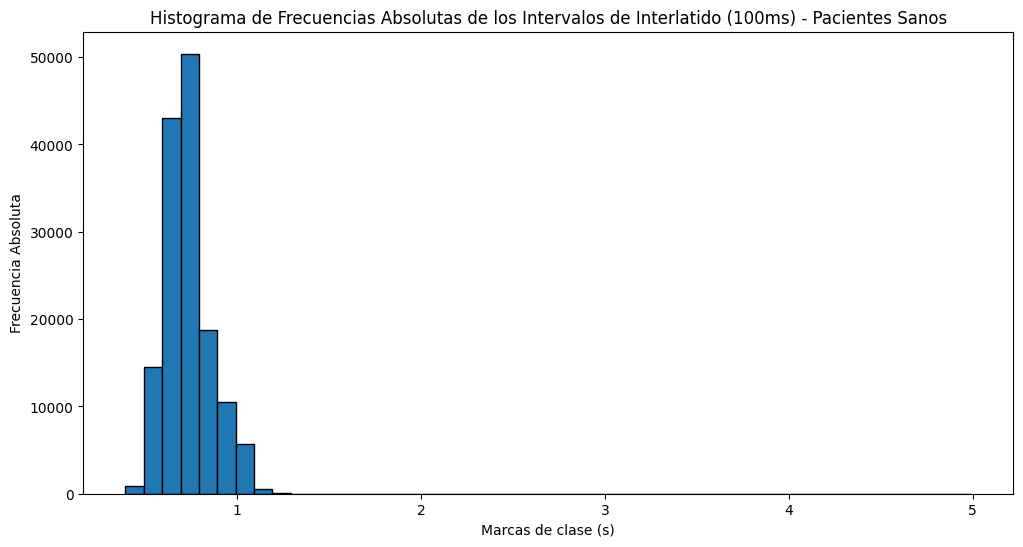

In [231]:
# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_sanos['Tiempos de interlatido'].min()
max_val = df_sanos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para todos los pacientes sanos:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Marcas de clase (s)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Pacientes Sanos')
plt.show()

### Paciente 1

Datos del paciente N°1:
         Paciente  Tiempos de interlatido
0       Paciente1                   0.711
5       Paciente1                   0.727
10      Paciente1                   0.734
15      Paciente1                   0.797
20      Paciente1                   0.797
...           ...                     ...
143835  Paciente1                   0.648
143837  Paciente1                   0.641
143839  Paciente1                   0.609
143841  Paciente1                   0.617
143843  Paciente1                   0.609

[31676 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°1:
      LI     LS     MC  Frecuencia Absoluta
0  0.438  0.538  0.488                 1814
1  0.538  0.638  0.588                10069
2  0.638  0.738  0.688                10367
3  0.738  0.838  0.788                 7589
4  0.838  0.938  0.888                 1745
5  0.938  1.038  0.988                   89
6  1.038  1.138  1.088             

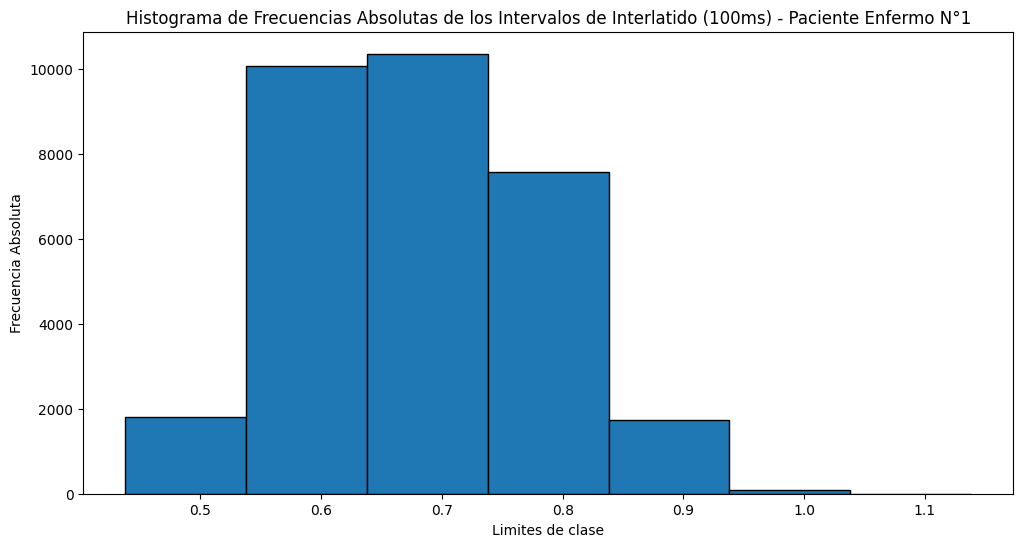

In [238]:
# Filtrar datos del paciente sano N°1
df_paciente_sano_1 = df_sanos[df_sanos['Paciente'] == 'Paciente1']

print("Datos del paciente N°1:")
print(df_paciente_sano_1)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_sano_1['Tiempos de interlatido'].min()
max_val = df_paciente_sano_1['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_sano_1['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°1:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°1')
plt.show()

### Paciente 2

Datos del paciente N°2:
         Paciente  Tiempos de interlatido
1       Paciente2                   1.016
6       Paciente2                   1.039
11      Paciente2                   1.008
16      Paciente2                   1.078
21      Paciente2                   1.109
...           ...                     ...
108696  Paciente2                   0.812
108701  Paciente2                   0.828
108706  Paciente2                   0.812
108711  Paciente2                   0.852
108716  Paciente2                   0.859

[21744 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°2:
       LI     LS     MC  Frecuencia Absoluta
0   0.484  0.584  0.534                  427
1   0.584  0.684  0.634                 1806
2   0.684  0.784  0.734                 3116
3   0.784  0.884  0.834                 4568
4   0.884  0.984  0.934                 5847
5   0.984  1.084  1.034                 5138
6   1.084  1.184  1.134     

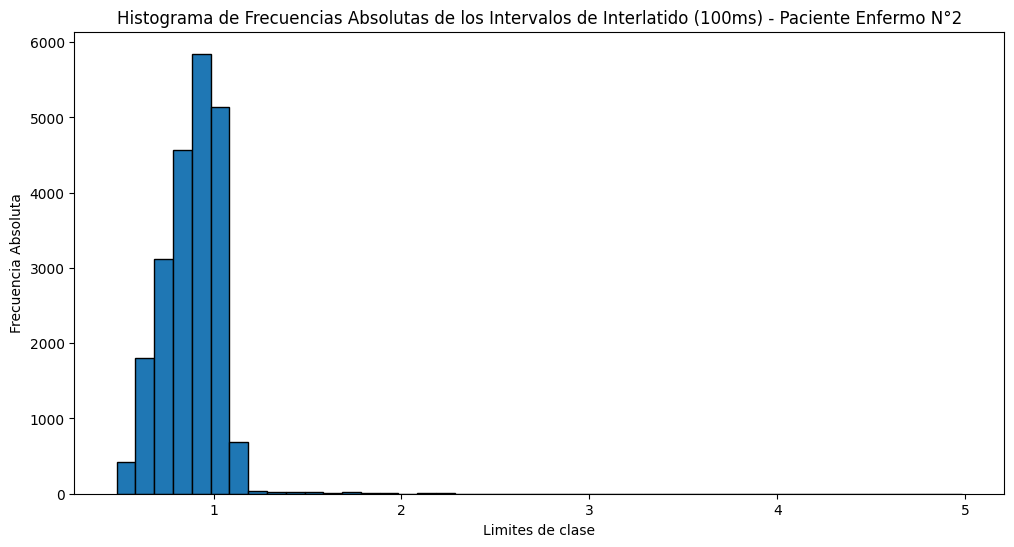

In [239]:
# Filtrar datos del paciente sano N°2
df_paciente_sano_2 = df_sanos[df_sanos['Paciente'] == 'Paciente2']

print("Datos del paciente N°2:")
print(df_paciente_sano_2)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_sano_2['Tiempos de interlatido'].min()
max_val = df_paciente_sano_2['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_sano_2['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°2:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°2')
plt.show()

### Paciente 3

Datos del paciente N°3:
         Paciente  Tiempos de interlatido
2       Paciente3                   0.734
7       Paciente3                   0.734
12      Paciente3                   0.766
17      Paciente3                   0.766
22      Paciente3                   0.734
...           ...                     ...
131413  Paciente3                   0.703
131417  Paciente3                   0.734
131421  Paciente3                   0.742
131425  Paciente3                   0.703
131429  Paciente3                   0.750

[27422 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°3:
      LI     LS     MC  Frecuencia Absoluta
0  0.422  0.522  0.472                  225
1  0.522  0.622  0.572                 1628
2  0.622  0.722  0.672                 4890
3  0.722  0.822  0.772                11098
4  0.822  0.922  0.872                 6831
5  0.922  1.022  0.972                 2307
6  1.022  1.122  1.072             

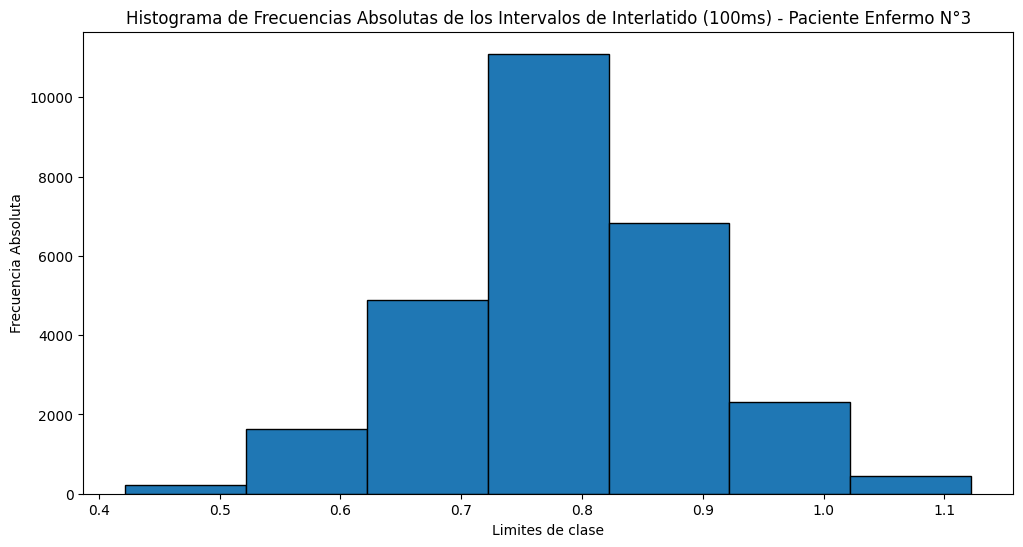

In [240]:
# Filtrar datos del paciente sano N°3
df_paciente_sano_3 = df_sanos[df_sanos['Paciente'] == 'Paciente3']

print("Datos del paciente N°3:")
print(df_paciente_sano_3)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_sano_3['Tiempos de interlatido'].min()
max_val = df_paciente_sano_3['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_sano_3['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°3:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°3')
plt.show()

### Paciente 4


Datos del paciente N°4:
         Paciente  Tiempos de interlatido
3       Paciente4                   0.719
8       Paciente4                   0.742
13      Paciente4                   0.742
18      Paciente4                   0.750
23      Paciente4                   0.711
...           ...                     ...
143133  Paciente4                   0.734
143136  Paciente4                   0.750
143139  Paciente4                   0.758
143142  Paciente4                   0.734
143145  Paciente4                   0.734

[31327 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°4:
      LI     LS     MC  Frecuencia Absoluta
0  0.391  0.491  0.441                  524
1  0.491  0.591  0.541                 3551
2  0.591  0.691  0.641                 9423
3  0.691  0.791  0.741                16112
4  0.791  0.891  0.841                 1703
5  0.891  0.991  0.941                   12


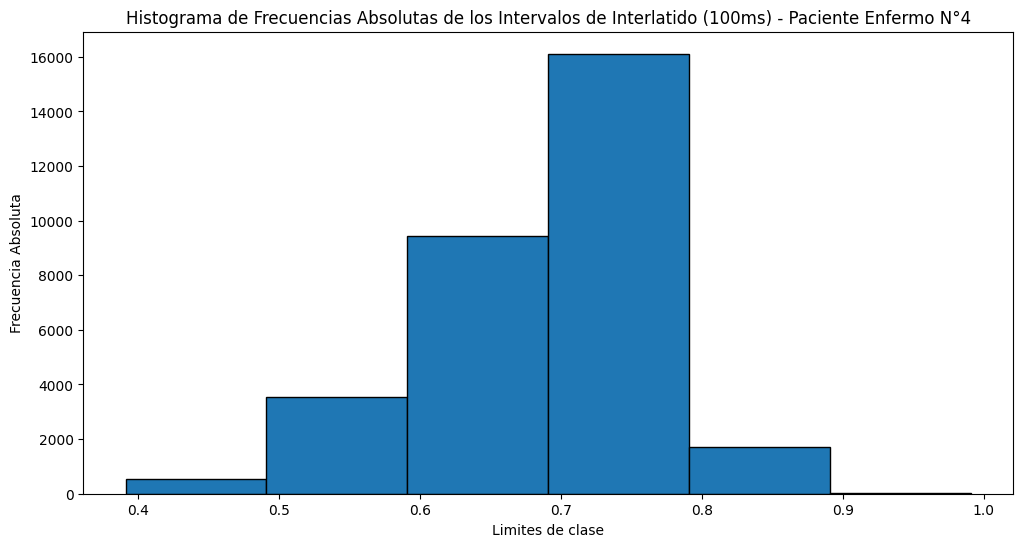

In [241]:
# Filtrar datos del paciente sano N°4
df_paciente_sano_4 = df_sanos[df_sanos['Paciente'] == 'Paciente4']

print("Datos del paciente N°4:")
print(df_paciente_sano_4)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_sano_4['Tiempos de interlatido'].min()
max_val = df_paciente_sano_4['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_sano_4['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°4:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°4')
plt.show()

### Paciente 5 

Datos del paciente N°5:
         Paciente  Tiempos de interlatido
4       Paciente5                   0.656
9       Paciente5                   0.664
14      Paciente5                   0.672
19      Paciente5                   0.656
24      Paciente5                   0.672
...           ...                     ...
144604  Paciente5                   0.641
144605  Paciente5                   0.641
144606  Paciente5                   0.641
144607  Paciente5                   0.641
144608  Paciente5                   0.633

[32440 rows x 2 columns]

Tabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°5:
      LI     LS     MC  Frecuencia Absoluta
0  0.453  0.553  0.503                  807
1  0.553  0.653  0.603                13239
2  0.653  0.753  0.703                16829
3  0.753  0.853  0.803                 1547


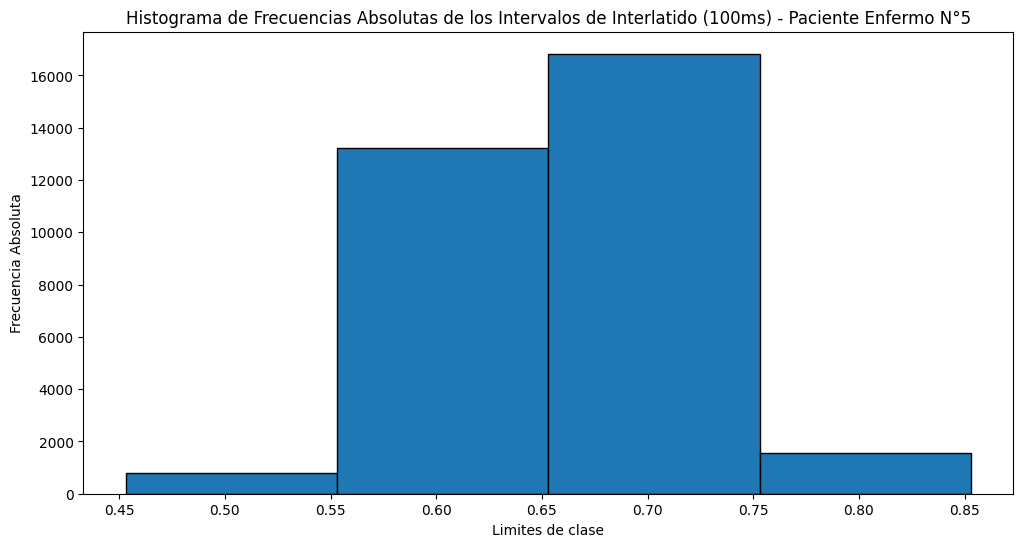

In [242]:
# Filtrar datos del paciente sano N°5
df_paciente_sano_5 = df_sanos[df_sanos['Paciente'] == 'Paciente5']

print("Datos del paciente N°5:")
print(df_paciente_sano_5)


# Definir intervalos de clase basados en los datos reales (100ms)
min_val = df_paciente_sano_5['Tiempos de interlatido'].min()
max_val = df_paciente_sano_5['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas
frecuencias = pd.cut(df_paciente_sano_5['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Crear tabla de frecuencias con los títulos especificados
tabla_frecuencias = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'Frecuencia Absoluta': frecuencias.values
})

print("\nTabla de frecuencias absolutas de los intervalos de interlatido (100ms) para el paciente enfermo N°5:")
print(tabla_frecuencias)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias['MC'], tabla_frecuencias['Frecuencia Absoluta'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Limites de clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Paciente Enfermo N°5')
plt.show()

# Cálculos

## Cálculo de frecuencia absoluta acumulada

### Frecuencia absoluta acumulada Enefermos


Tabla de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) para Pacientes Enfermos:
       LI     LS     MC     FE    FPE1    FPE2    FPE3    FPE4    FPE5
0   0.488  0.588  0.538  17534   17534   17534   17534   17534   17534
1   0.588  0.688  0.638  25587   43121   43121   43121   43121   43121
2   0.688  0.788  0.738  44117   87238   87238   87238   87238   87238
3   0.788  0.888  0.838  21443  108681  108681  108681  108681  108681
4   0.888  0.988  0.938  25948  134629  134629  134629  134629  134629
5   0.988  1.088  1.038   4622  139251  139251  139251  139251  139251
6   1.088  1.188  1.138     26  139277  139277  139277  139277  139277
7   1.188  1.288  1.238      1  139278  139278  139278  139278  139278
8   1.288  1.388  1.338      0  139278  139278  139278  139278  139278
9   1.388  1.488  1.438      0  139278  139278  139278  139278  139278
10  1.488  1.588  1.538      0  139278  139278  139278  139278  139278
11  1.588  1.688  1.638      0  139278  139278  13

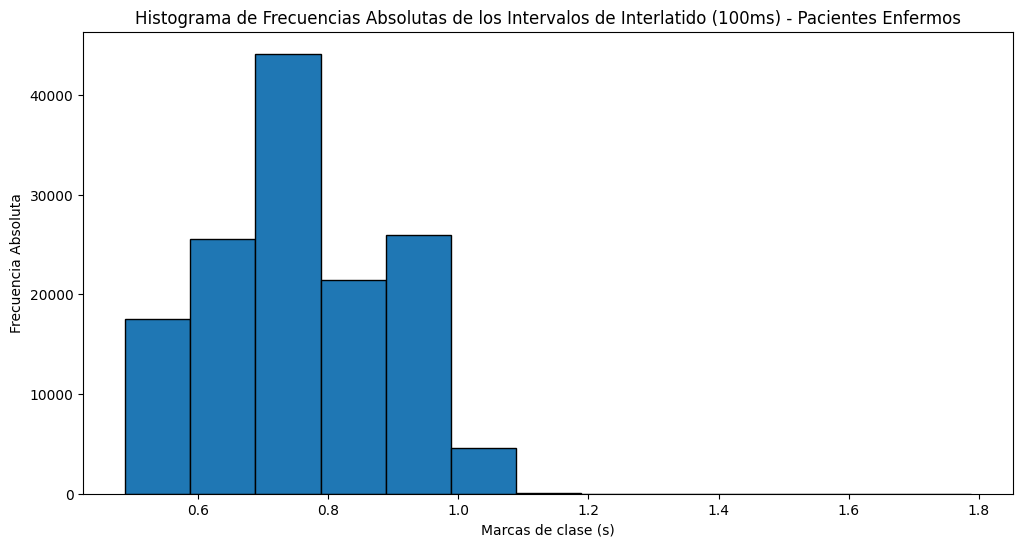

In [243]:
# Calcular intervalos de clase basados en los datos reales (100ms)
min_val = df_enfermos['Tiempos de interlatido'].min()
max_val = df_enfermos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas para pacientes enfermos usando los intervalos
frecuencias_absolutas = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas acumuladas
frecuencias_absolutas_acumuladas = frecuencias_absolutas.cumsum()

# Crear tabla de frecuencias absolutas con los títulos especificados
tabla_frecuencias_absolutas = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'FE': frecuencias_absolutas.values,
    'FPE1': frecuencias_absolutas_acumuladas.values,
    'FPE2': frecuencias_absolutas_acumuladas.values,
    'FPE3': frecuencias_absolutas_acumuladas.values,
    'FPE4': frecuencias_absolutas_acumuladas.values,
    'FPE5': frecuencias_absolutas_acumuladas.values
})

# Mostrar la tabla de frecuencias absolutas
print("\nTabla de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) para Pacientes Enfermos:")
print(tabla_frecuencias_absolutas)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_absolutas['MC'], tabla_frecuencias_absolutas['FE'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Marcas de clase (s)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Pacientes Enfermos')
plt.show()

### Frecuencia absoluta acumulada Sanos


Tabla de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) para Pacientes Sanos:
       LI     LS     MC     FS    FPS1    FPS2    FPS3    FPS4    FPS5
0   0.391  0.491  0.441    932     932     932     932     932     932
1   0.491  0.591  0.541  14567   15499   15499   15499   15499   15499
2   0.591  0.691  0.641  43056   58555   58555   58555   58555   58555
3   0.691  0.791  0.741  50390  108945  108945  108945  108945  108945
4   0.791  0.891  0.841  18700  127645  127645  127645  127645  127645
5   0.891  0.991  0.941  10545  138190  138190  138190  138190  138190
6   0.991  1.091  1.041   5720  143910  143910  143910  143910  143910
7   1.091  1.191  1.141    544  144454  144454  144454  144454  144454
8   1.191  1.291  1.241     27  144481  144481  144481  144481  144481
9   1.291  1.391  1.341     19  144500  144500  144500  144500  144500
10  1.391  1.491  1.441     17  144517  144517  144517  144517  144517
11  1.491  1.591  1.541     18  144535  144535  14453

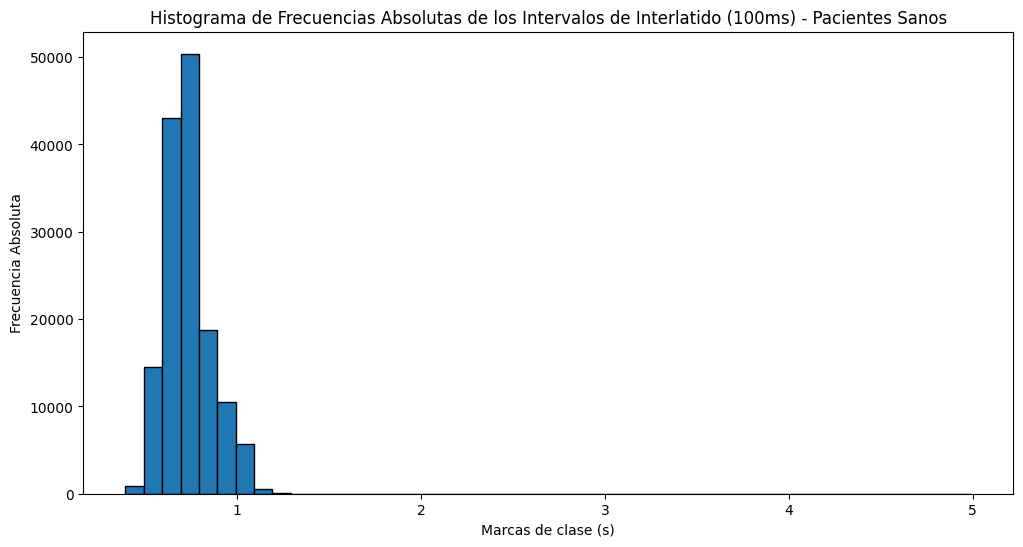

In [244]:
# Calcular intervalos de clase basados en los datos reales (100ms)
min_val = df_sanos['Tiempos de interlatido'].min()
max_val = df_sanos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas para pacientes sanos usando los intervalos
frecuencias_absolutas = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas acumuladas
frecuencias_absolutas_acumuladas = frecuencias_absolutas.cumsum()

# Crear tabla de frecuencias absolutas con los títulos especificados
tabla_frecuencias_absolutas = pd.DataFrame({
    'LI': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [interval.mid for interval in intervalos],
    'FS': frecuencias_absolutas.values,
    'FPS1': frecuencias_absolutas_acumuladas.values,
    'FPS2': frecuencias_absolutas_acumuladas.values,
    'FPS3': frecuencias_absolutas_acumuladas.values,
    'FPS4': frecuencias_absolutas_acumuladas.values,
    'FPS5': frecuencias_absolutas_acumuladas.values
})

# Mostrar la tabla de frecuencias absolutas
print("\nTabla de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) para Pacientes Sanos:")
print(tabla_frecuencias_absolutas)

# Graficar histograma de frecuencias absolutas
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_absolutas['MC'], tabla_frecuencias_absolutas['FS'], width=0.1, edgecolor='black', align='center')
plt.xlabel('Marcas de clase (s)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas de los Intervalos de Interlatido (100ms) - Pacientes Sanos')
plt.show()

### Frecuencia absoluta acumulada por grupos

Tabla de frecuencias absolutas acumuladas de tiempos de interlatido por grupo con marcas de clase:
       LI      LS      MC     f_s     f_e     f_t   fpe_s   fpe_e   fpe_t
0  0.3910  0.8558  0.6234  123010  101624  224634  123010  101624  224634
1  0.8558  1.3206  1.0882   21475   37658   59133  144485  139282  283767
2  1.3206  1.7854  1.5530      82       0      82  144567  139282  283849
3  1.7854  2.2502  2.0178      23       1      24  144590  139283  283873
4  2.2502  2.7150  2.4826       4       0       4  144594  139283  283877
5  2.7150  3.1798  2.9474       6       0       6  144600  139283  283883
6  3.1798  3.6446  3.4122       5       0       5  144605  139283  283888
7  3.6446  4.1094  3.8770       1       0       1  144606  139283  283889
8  4.1094  4.5742  4.3418       0       0       0  144606  139283  283889
9  4.5742  5.0390  4.8066       2       0       2  144608  139283  283891


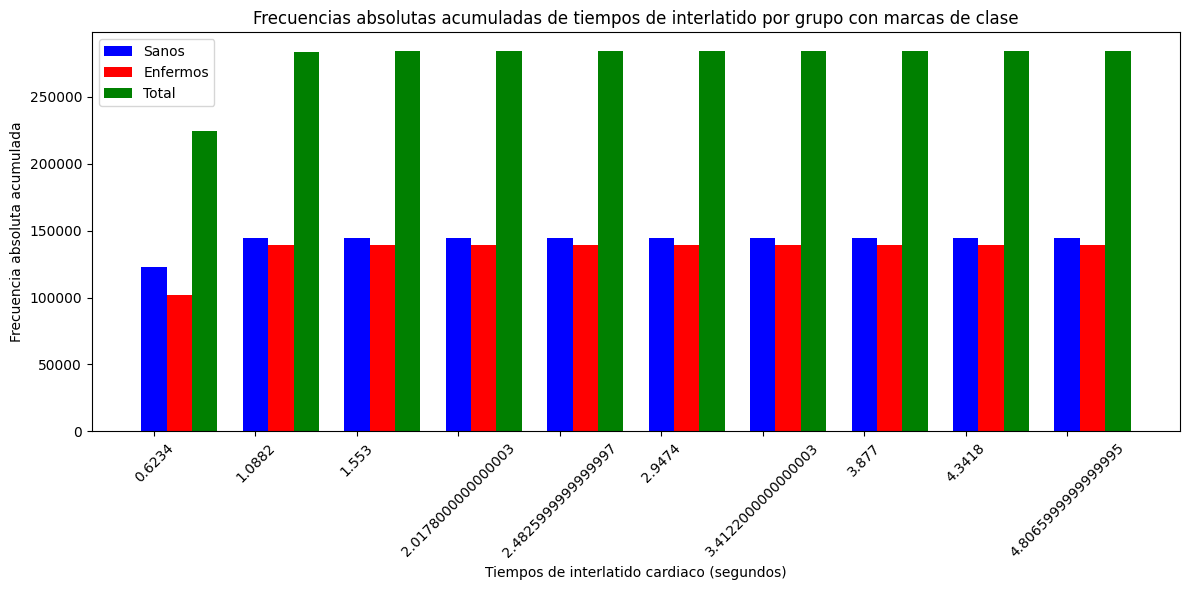

In [253]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_sanos['Tiempos de interlatido'].min(), 
                               end=df_sanos['Tiempos de interlatido'].max(), 
                               freq=(df_sanos['Tiempos de interlatido'].max() - df_sanos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular la frecuencia total
frecuencia_total = frecuencias_absolutas_sanos + frecuencias_absolutas_enfermos

# Calcular las frecuencias absolutas acumuladas
frecuencias_absolutas_acumuladas_sanos = frecuencias_absolutas_sanos.cumsum()
frecuencias_absolutas_acumuladas_enfermos = frecuencias_absolutas_enfermos.cumsum()
frecuencias_absolutas_acumuladas_total = frecuencia_total.cumsum()

# Calcular marcas de clase, límites reales inferiores (LRI) y límites reales superiores (LRS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias absolutas acumuladas por grupos
tabla_frecuencias_abs_acum = pd.DataFrame({
    'LI': LI,
    'LS': LS,
    'MC': MC,
    'f_s': frecuencias_absolutas_sanos.values,
    'f_e': frecuencias_absolutas_enfermos.values,
    'f_t': frecuencia_total.values,
    'fpe_s': frecuencias_absolutas_acumuladas_sanos.values,
    'fpe_e': frecuencias_absolutas_acumuladas_enfermos.values,
    'fpe_t': frecuencias_absolutas_acumuladas_total.values,
})

# Imprimir la tabla de frecuencias absolutas acumuladas por grupos con marcas de clase
print("Tabla de frecuencias absolutas acumuladas de tiempos de interlatido por grupo con marcas de clase:")
print(tabla_frecuencias_abs_acum)

# Graficar las frecuencias absolutas acumuladas por grupos con marcas de clase
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs_acum.index, tabla_frecuencias_abs_acum['fpe_s'], width=0.25, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_abs_acum.index + 0.25, tabla_frecuencias_abs_acum['fpe_e'], width=0.25, label='Enfermos', color='red', align='center')
plt.bar(tabla_frecuencias_abs_acum.index + 0.5, tabla_frecuencias_abs_acum['fpe_t'], width=0.25, label='Total', color='green', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta acumulada')
plt.title('Frecuencias absolutas acumuladas de tiempos de interlatido por grupo con marcas de clase')
plt.legend()
plt.xticks(range(len(tabla_frecuencias_abs_acum)), tabla_frecuencias_abs_acum['MC'], rotation=45)
plt.tight_layout()
plt.show()

## Cálculo de frecuencia relativa acumulada

### Frecuencias relativas acumuladas en enfermos

Tabla de frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase:
       LS      MC    F_E     F_PE1     F_PE2     F_PE3     F_PE4     F_PE5
0  0.6236  0.5558  29768  0.213731  0.213731  0.213731  0.213731  0.213731
1  0.7592  0.6914  46777  0.549584  0.549584  0.549584  0.549584  0.549584
2  0.8948  0.8270  34627  0.798202  0.798202  0.798202  0.798202  0.798202
3  1.0304  0.9626  27836  0.998061  0.998061  0.998061  0.998061  0.998061
4  1.1660  1.0982    266  0.999971  0.999971  0.999971  0.999971  0.999971
5  1.3016  1.2338      4  1.000000  1.000000  1.000000  1.000000  1.000000
6  1.4372  1.3694      0  1.000000  1.000000  1.000000  1.000000  1.000000
7  1.5728  1.5050      0  1.000000  1.000000  1.000000  1.000000  1.000000
8  1.7084  1.6406      0  1.000000  1.000000  1.000000  1.000000  1.000000
9  1.8440  1.7762      0  1.000000  1.000000  1.000000  1.000000  1.000000


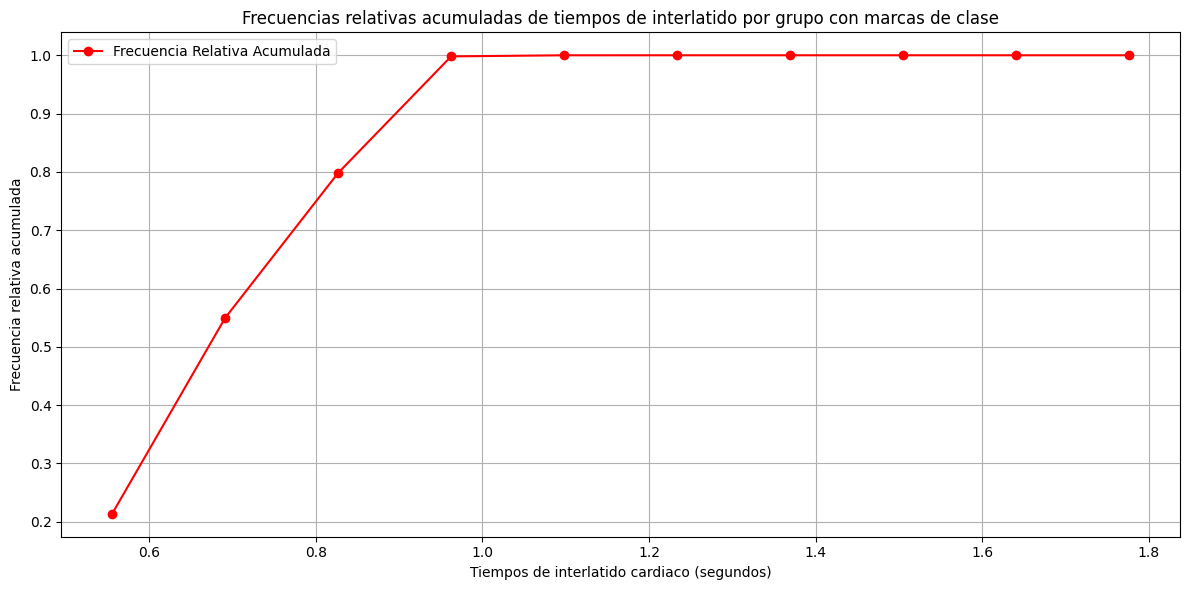

In [254]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_enfermos['Tiempos de interlatido'].min(), 
                               end=df_enfermos['Tiempos de interlatido'].max(), 
                               freq=(df_enfermos['Tiempos de interlatido'].max() - df_enfermos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para enfermos
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas acumuladas
frecuencias_absolutas_acumuladas_enfermos = frecuencias_absolutas_enfermos.cumsum()

# Calcular las frecuencias relativas y acumuladas
frecuencias_relativas_enfermos = frecuencias_absolutas_enfermos / frecuencias_absolutas_enfermos.sum()
frecuencias_relativas_acumuladas_enfermos = frecuencias_relativas_enfermos.cumsum()

# Calcular marcas de clase y límites superiores (LS)
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias relativas acumuladas de enfermos
tabla_frecuencias_rel_acum = pd.DataFrame({
    'LS': LS,
    'MC': MC,
    'F_E': frecuencias_absolutas_enfermos.values,
    'F_PE1': frecuencias_relativas_acumuladas_enfermos.values,
    'F_PE2': frecuencias_relativas_acumuladas_enfermos.values,
    'F_PE3': frecuencias_relativas_acumuladas_enfermos.values,
    'F_PE4': frecuencias_relativas_acumuladas_enfermos.values,
    'F_PE5': frecuencias_relativas_acumuladas_enfermos.values,
})

# Imprimir la tabla de frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase
print("Tabla de frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase:")
print(tabla_frecuencias_rel_acum)

# Graficar las frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase
plt.figure(figsize=(12, 6))
plt.plot(tabla_frecuencias_rel_acum['MC'], tabla_frecuencias_rel_acum['F_PE1'], marker='o', label='Frecuencia Relativa Acumulada', color='red')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa acumulada')
plt.title('Frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Frecuencias relativas acumuladas en sanos

Tabla de frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase:
       LS      MC      FS      FPS1      FPS2      FPS3      FPS4      FPS5
0  0.8558  0.6234  123010  0.850645  0.850645  0.850645  0.850645  0.850645
1  1.3206  1.0882   21475  0.999149  0.999149  0.999149  0.999149  0.999149
2  1.7854  1.5530      82  0.999716  0.999716  0.999716  0.999716  0.999716
3  2.2502  2.0178      23  0.999876  0.999876  0.999876  0.999876  0.999876
4  2.7150  2.4826       4  0.999903  0.999903  0.999903  0.999903  0.999903
5  3.1798  2.9474       6  0.999945  0.999945  0.999945  0.999945  0.999945
6  3.6446  3.4122       5  0.999979  0.999979  0.999979  0.999979  0.999979
7  4.1094  3.8770       1  0.999986  0.999986  0.999986  0.999986  0.999986
8  4.5742  4.3418       0  0.999986  0.999986  0.999986  0.999986  0.999986
9  5.0390  4.8066       2  1.000000  1.000000  1.000000  1.000000  1.000000


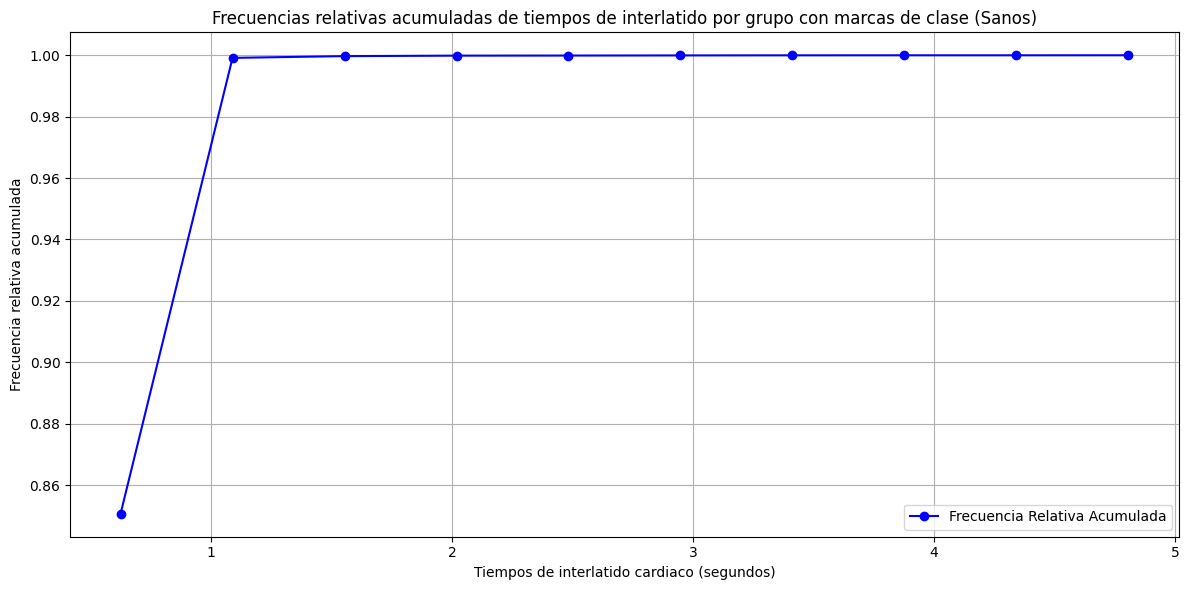

In [256]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_sanos['Tiempos de interlatido'].min(), 
                               end=df_sanos['Tiempos de interlatido'].max(), 
                               freq=(df_sanos['Tiempos de interlatido'].max() - df_sanos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para sanos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas acumuladas
frecuencias_absolutas_acumuladas_sanos = frecuencias_absolutas_sanos.cumsum()

# Calcular las frecuencias relativas y acumuladas
frecuencias_relativas_sanos = frecuencias_absolutas_sanos / frecuencias_absolutas_sanos.sum()
frecuencias_relativas_acumuladas_sanos = frecuencias_relativas_sanos.cumsum()

# Calcular marcas de clase y límites superiores (LS)
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias relativas acumuladas de sanos
tabla_frecuencias_rel_acum_sanos = pd.DataFrame({
    'LS': LS,
    'MC': MC,
    'FS': frecuencias_absolutas_sanos.values,
    'FPS1': frecuencias_relativas_acumuladas_sanos.values,
    'FPS2': frecuencias_relativas_acumuladas_sanos.values,
    'FPS3': frecuencias_relativas_acumuladas_sanos.values,
    'FPS4': frecuencias_relativas_acumuladas_sanos.values,
    'FPS5': frecuencias_relativas_acumuladas_sanos.values,
})

# Imprimir la tabla de frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase
print("Tabla de frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase:")
print(tabla_frecuencias_rel_acum_sanos)

# Graficar las frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase
plt.figure(figsize=(12, 6))
plt.plot(tabla_frecuencias_rel_acum_sanos['MC'], tabla_frecuencias_rel_acum_sanos['FPS1'], marker='o', label='Frecuencia Relativa Acumulada', color='blue')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa acumulada')
plt.title('Frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase (Sanos)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Frecuencias relativas acumuladas por grupo

Tabla de frecuencias relativas acumuladas por grupos:
       Li      LS      MC       F_s       F_e       F_t
0  0.3910  0.8558  0.6234  0.850645  0.729622  0.791268
1  0.8558  1.3206  1.0882  0.999149  0.999993  0.999563
2  1.3206  1.7854  1.5530  0.999716  0.999993  0.999852
3  1.7854  2.2502  2.0178  0.999876  1.000000  0.999937
4  2.2502  2.7150  2.4826  0.999903  1.000000  0.999951
5  2.7150  3.1798  2.9474  0.999945  1.000000  0.999972
6  3.1798  3.6446  3.4122  0.999979  1.000000  0.999989
7  3.6446  4.1094  3.8770  0.999986  1.000000  0.999993
8  4.1094  4.5742  4.3418  0.999986  1.000000  0.999993
9  4.5742  5.0390  4.8066  1.000000  1.000000  1.000000


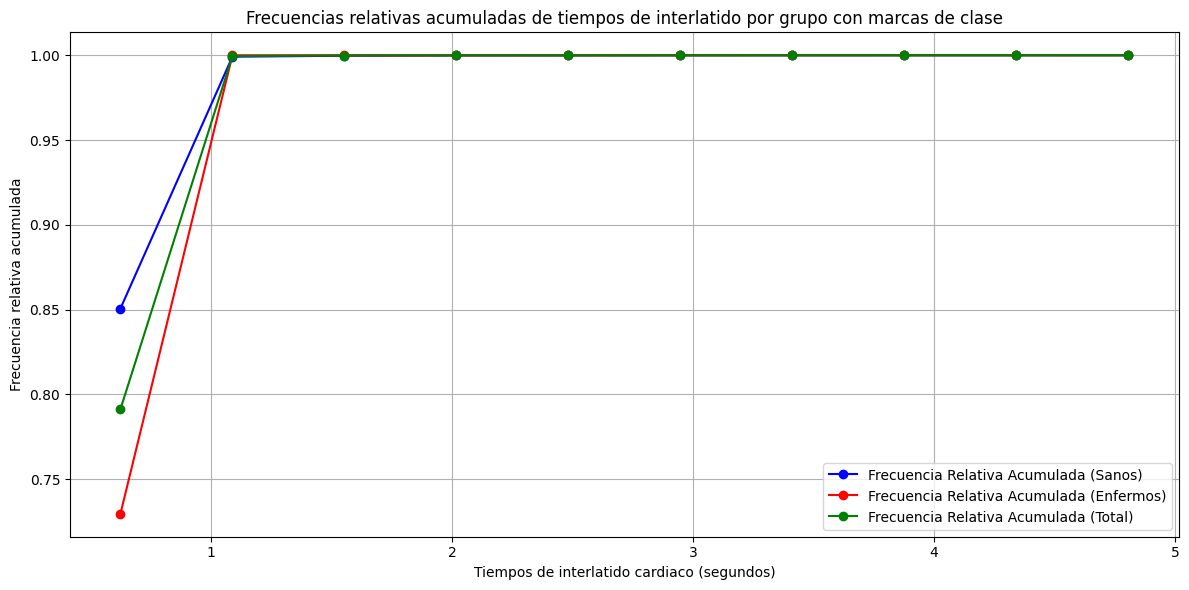

In [258]:
# Definir límites de intervalos basados en los datos reales
min_val = min(df_sanos['Tiempos de interlatido'].min(), df_enfermos['Tiempos de interlatido'].min())
max_val = max(df_sanos['Tiempos de interlatido'].max(), df_enfermos['Tiempos de interlatido'].max())
intervalos = pd.interval_range(start=min_val, 
                               end=max_val, 
                               freq=(max_val - min_val) / 10)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular la frecuencia total
frecuencia_total = frecuencias_absolutas_sanos + frecuencias_absolutas_enfermos

# Calcular las frecuencias absolutas acumuladas
frecuencias_absolutas_acumuladas_sanos = frecuencias_absolutas_sanos.cumsum()
frecuencias_absolutas_acumuladas_enfermos = frecuencias_absolutas_enfermos.cumsum()
frecuencia_total_acumulada = frecuencia_total.cumsum()

# Calcular las frecuencias relativas y acumuladas
frecuencias_relativas_sanos = frecuencias_absolutas_sanos / frecuencias_absolutas_sanos.sum()
frecuencias_relativas_acumuladas_sanos = frecuencias_relativas_sanos.cumsum()
frecuencias_relativas_enfermos = frecuencias_absolutas_enfermos / frecuencias_absolutas_enfermos.sum()
frecuencias_relativas_acumuladas_enfermos = frecuencias_relativas_enfermos.cumsum()
frecuencias_relativas_totales = frecuencia_total / frecuencia_total.sum()
frecuencias_relativas_acumuladas_totales = frecuencias_relativas_totales.cumsum()

# Calcular marcas de clase, límites inferiores (LI) y límites superiores (LS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias relativas acumuladas por grupos
tabla_frecuencias_rel_acum_grupos = pd.DataFrame({
    'Li': LI,
    'LS': LS,
    'MC': MC,
    'F_s': frecuencias_relativas_acumuladas_sanos.values,
    'F_e': frecuencias_relativas_acumuladas_enfermos.values,
    'F_t': frecuencias_relativas_acumuladas_totales.values,
})

# Imprimir la tabla de frecuencias relativas acumuladas por grupos
print("Tabla de frecuencias relativas acumuladas por grupos:")
print(tabla_frecuencias_rel_acum_grupos)

# Graficar las frecuencias relativas acumuladas por grupos
plt.figure(figsize=(12, 6))
plt.plot(tabla_frecuencias_rel_acum_grupos['MC'], tabla_frecuencias_rel_acum_grupos['F_s'], marker='o', label='Frecuencia Relativa Acumulada (Sanos)', color='blue')
plt.plot(tabla_frecuencias_rel_acum_grupos['MC'], tabla_frecuencias_rel_acum_grupos['F_e'], marker='o', label='Frecuencia Relativa Acumulada (Enfermos)', color='red')
plt.plot(tabla_frecuencias_rel_acum_grupos['MC'], tabla_frecuencias_rel_acum_grupos['F_t'], marker='o', label='Frecuencia Relativa Acumulada (Total)', color='green')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa acumulada')
plt.title('Frecuencias relativas acumuladas de tiempos de interlatido por grupo con marcas de clase')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Cálculo de frecuencia absoluta sobreviviente

### Frecuencias absolutas supervivientes de los intervalos de interlatido (100ms) de los pacientes enfermos

Tabla de frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) de los pacientes enfermos:
       Li     LS     MC     FE    SFE1    SFE2    SFE3    SFE4    SFE5
0   0.488  0.588  0.538  17534  139278  139278  139278  139278  139278
1   0.588  0.688  0.638  25587  121744  121744  121744  121744  121744
2   0.688  0.788  0.738  44117   96157   96157   96157   96157   96157
3   0.788  0.888  0.838  21443   52040   52040   52040   52040   52040
4   0.888  0.988  0.938  25948   30597   30597   30597   30597   30597
5   0.988  1.088  1.038   4622    4649    4649    4649    4649    4649
6   1.088  1.188  1.138     26      27      27      27      27      27
7   1.188  1.288  1.238      1       1       1       1       1       1
8   1.288  1.388  1.338      0       0       0       0       0       0
9   1.388  1.488  1.438      0       0       0       0       0       0
10  1.488  1.588  1.538      0       0       0       0       0       0
11  1.588  1.688  1.638      0    

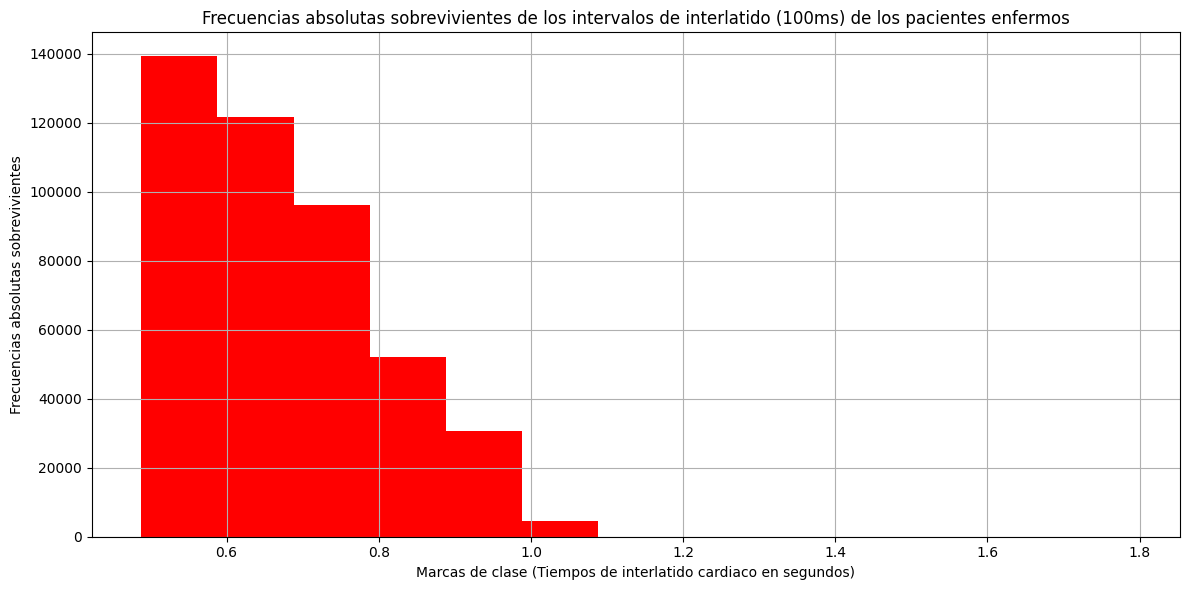

In [262]:
# Definir límites de intervalos basados en los datos reales (100 ms)
min_val = df_enfermos['Tiempos de interlatido'].min()
max_val = df_enfermos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas para los pacientes enfermos
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas sobrevivientes
frecuencias_absolutas_sobrevivientes = frecuencias_absolutas_enfermos[::-1].cumsum()[::-1]

# Calcular marcas de clase, límites inferiores (LI) y límites superiores (LS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias absolutas sobrevivientes
tabla_frecuencias_abs_sobrevivientes = pd.DataFrame({
    'Li': LI,
    'LS': LS,
    'MC': MC,
    'FE': frecuencias_absolutas_enfermos.values,
    'SFE1': frecuencias_absolutas_sobrevivientes.values,
    'SFE2': frecuencias_absolutas_sobrevivientes.values,
    'SFE3': frecuencias_absolutas_sobrevivientes.values,
    'SFE4': frecuencias_absolutas_sobrevivientes.values,
    'SFE5': frecuencias_absolutas_sobrevivientes.values,
})

# Imprimir la tabla de frecuencias absolutas sobrevivientes
print("Tabla de frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) de los pacientes enfermos:")
print(tabla_frecuencias_abs_sobrevivientes)

# Graficar las frecuencias absolutas sobrevivientes
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs_sobrevivientes['MC'], tabla_frecuencias_abs_sobrevivientes['SFE1'], width=0.1, color='red', align='center')
plt.xlabel('Marcas de clase (Tiempos de interlatido cardiaco en segundos)')
plt.ylabel('Frecuencias absolutas sobrevivientes')
plt.title('Frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) de los pacientes enfermos')
plt.grid(True)
plt.tight_layout()
plt.show()

### Frecuencias absolutas supervivientes de los intervalos de interlatido (100ms) de los pacientes enfermos

Tabla de frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) de los pacientes sanos:
       Li     LS     MC     FS    SFS1    SFS2    SFS3    SFS4    SFS5
0   0.391  0.491  0.441    932  144607  144607  144607  144607  144607
1   0.491  0.591  0.541  14567  143675  143675  143675  143675  143675
2   0.591  0.691  0.641  43056  129108  129108  129108  129108  129108
3   0.691  0.791  0.741  50390   86052   86052   86052   86052   86052
4   0.791  0.891  0.841  18700   35662   35662   35662   35662   35662
5   0.891  0.991  0.941  10545   16962   16962   16962   16962   16962
6   0.991  1.091  1.041   5720    6417    6417    6417    6417    6417
7   1.091  1.191  1.141    544     697     697     697     697     697
8   1.191  1.291  1.241     27     153     153     153     153     153
9   1.291  1.391  1.341     19     126     126     126     126     126
10  1.391  1.491  1.441     17     107     107     107     107     107
11  1.491  1.591  1.541     18      9

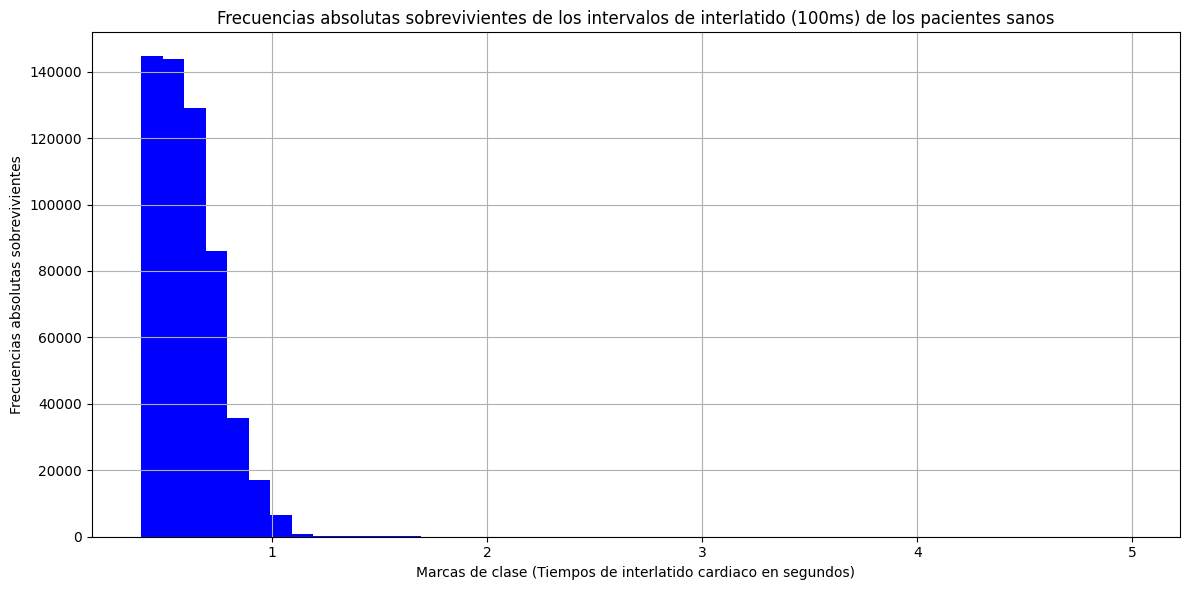

In [260]:
# Definir límites de intervalos basados en los datos reales (100 ms)
min_val = df_sanos['Tiempos de interlatido'].min()
max_val = df_sanos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas para los pacientes sanos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas sobrevivientes
frecuencias_absolutas_sobrevivientes = frecuencias_absolutas_sanos[::-1].cumsum()[::-1]

# Calcular marcas de clase, límites inferiores (LI) y límites superiores (LS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias absolutas sobrevivientes
tabla_frecuencias_abs_sobrevivientes = pd.DataFrame({
    'Li': LI,
    'LS': LS,
    'MC': MC,
    'FS': frecuencias_absolutas_sanos.values,
    'SFS1': frecuencias_absolutas_sobrevivientes.values,
    'SFS2': frecuencias_absolutas_sobrevivientes.values,
    'SFS3': frecuencias_absolutas_sobrevivientes.values,
    'SFS4': frecuencias_absolutas_sobrevivientes.values,
    'SFS5': frecuencias_absolutas_sobrevivientes.values,
})

# Imprimir la tabla de frecuencias absolutas sobrevivientes
print("Tabla de frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) de los pacientes sanos:")
print(tabla_frecuencias_abs_sobrevivientes)

# Graficar las frecuencias absolutas sobrevivientes
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs_sobrevivientes['MC'], tabla_frecuencias_abs_sobrevivientes['SFS1'], width=0.1, color='blue', align='center')
plt.xlabel('Marcas de clase (Tiempos de interlatido cardiaco en segundos)')
plt.ylabel('Frecuencias absolutas sobrevivientes')
plt.title('Frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) de los pacientes sanos')
plt.grid(True)
plt.tight_layout()
plt.show()

### Frecuencias absolutas por grupos

Tabla de frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) por grupos:
       LI     LS     MC     SFs     SFe     SFt
0   0.391  0.491  0.441  144607  139283  283890
1   0.491  0.591  0.541  143675  139279  282954
2   0.591  0.691  0.641  129108  121745  250853
3   0.691  0.791  0.741   86052   96158  182210
4   0.791  0.891  0.841   35662   50768   86430
5   0.891  0.991  0.941   16962   29452   46414
6   0.991  1.091  1.041    6417    4008   10425
7   1.091  1.191  1.141     697      23     720
8   1.191  1.291  1.241     153       2     155
9   1.291  1.391  1.341     126       1     127
10  1.391  1.491  1.441     107       1     108
11  1.491  1.591  1.541      90       1      91
12  1.591  1.691  1.641      72       1      73
13  1.691  1.791  1.741      55       1      56
14  1.791  1.891  1.841      40       1      41
15  1.891  1.991  1.941      31       0      31
16  1.991  2.091  2.041      28       0      28
17  2.091  2.191  2.141      25      

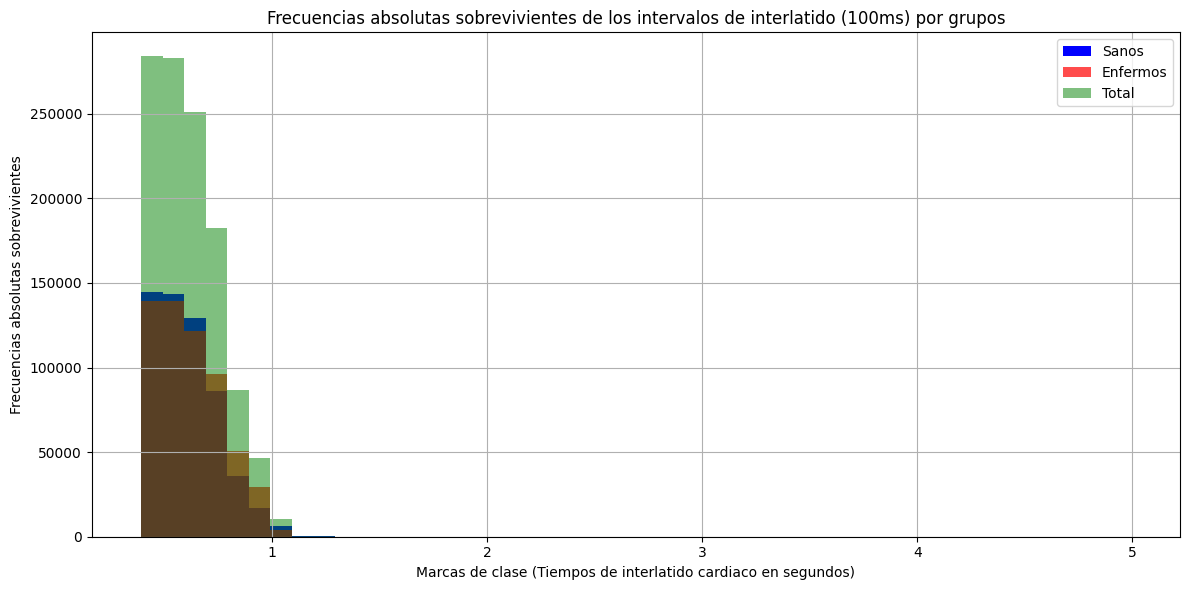

In [263]:
# Definir límites de intervalos basados en los datos reales (100 ms)
min_val = min(df_sanos['Tiempos de interlatido'].min(), df_enfermos['Tiempos de interlatido'].min())
max_val = max(df_sanos['Tiempos de interlatido'].max(), df_enfermos['Tiempos de interlatido'].max())
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas para sanos y enfermos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas sobrevivientes
frecuencias_absolutas_sobrevivientes_sanos = frecuencias_absolutas_sanos[::-1].cumsum()[::-1]
frecuencias_absolutas_sobrevivientes_enfermos = frecuencias_absolutas_enfermos[::-1].cumsum()[::-1]
frecuencia_total = frecuencias_absolutas_sobrevivientes_sanos + frecuencias_absolutas_sobrevivientes_enfermos

# Calcular marcas de clase, límites inferiores (LI) y límites superiores (LS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias absolutas sobrevivientes por grupos
tabla_frecuencias_abs_sobrevivientes = pd.DataFrame({
    'LI': LI,
    'LS': LS,
    'MC': MC,
    'SFs': frecuencias_absolutas_sobrevivientes_sanos.values,
    'SFe': frecuencias_absolutas_sobrevivientes_enfermos.values,
    'SFt': frecuencia_total.values,
})

# Imprimir la tabla de frecuencias absolutas sobrevivientes por grupos
print("Tabla de frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) por grupos:")
print(tabla_frecuencias_abs_sobrevivientes)

# Graficar las frecuencias absolutas sobrevivientes por grupos
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs_sobrevivientes['MC'], tabla_frecuencias_abs_sobrevivientes['SFs'], width=0.1, color='blue', label='Sanos', align='center')
plt.bar(tabla_frecuencias_abs_sobrevivientes['MC'], tabla_frecuencias_abs_sobrevivientes['SFe'], width=0.1, color='red', label='Enfermos', alpha=0.7, align='center')
plt.bar(tabla_frecuencias_abs_sobrevivientes['MC'], tabla_frecuencias_abs_sobrevivientes['SFt'], width=0.1, color='green', label='Total', alpha=0.5, align='center')
plt.xlabel('Marcas de clase (Tiempos de interlatido cardiaco en segundos)')
plt.ylabel('Frecuencias absolutas sobrevivientes')
plt.title('Frecuencias absolutas sobrevivientes de los intervalos de interlatido (100ms) por grupos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Cálculo de frecuencia relativa sobreviviente

### Frecuencias Relativas Sobreviviente de los pacientes enfermos

Tabla de frecuencias relativas sobrevivientes de los pacientes enfermos:
      U     LS     MC        FE     SF E1     SF E2     SF E3     SF E4  \
0   0.1  0.588  0.538  0.313341  0.202841  0.227486  0.657758  0.343118   
1   0.1  0.688  0.638  0.273894  0.202841  0.227477  0.341574  0.343118   
2   0.1  0.788  0.738  0.216330  0.202841  0.223970  0.000668  0.297362   
3   0.1  0.888  0.838  0.117077  0.193717  0.198432  0.000000  0.016329   
4   0.1  0.988  0.938  0.068836  0.158006  0.121151  0.000000  0.000073   
5   0.1  1.088  1.038  0.010459  0.039693  0.001281  0.000000  0.000000   
6   0.1  1.188  1.138  0.000061  0.000062  0.000193  0.000000  0.000000   
7   0.1  1.288  1.238  0.000002  0.000000  0.000010  0.000000  0.000000   
8   0.1  1.388  1.338  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.1  1.488  1.438  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.1  1.588  1.538  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.1  1.688  1.638  0.00

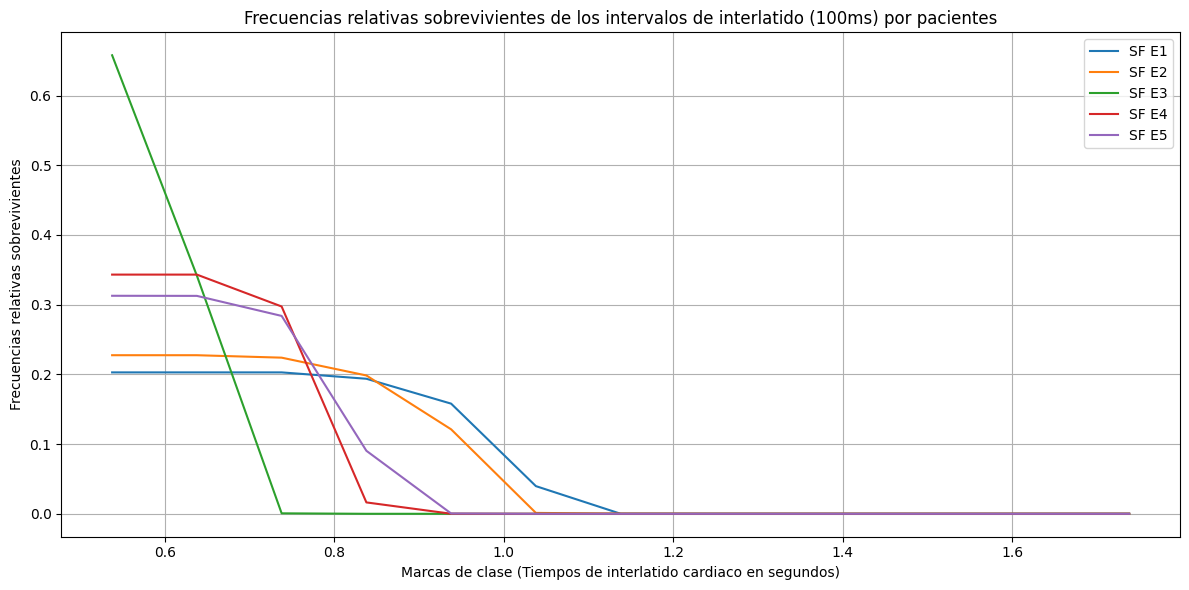

In [265]:
# Definir límites de intervalos basados en los datos reales (100 ms)
min_val = df_enfermos['Tiempos de interlatido'].min()
max_val = df_enfermos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Crear una lista de pacientes
pacientes = df_enfermos['Paciente'].unique()

# Inicializar un DataFrame para las frecuencias absolutas sobrevivientes de cada paciente
frecuencias_absolutas_sobrevivientes = pd.DataFrame(index=intervalos)

# Calcular las frecuencias absolutas sobrevivientes para cada paciente
for paciente in pacientes:
    datos_paciente = df_enfermos[df_enfermos['Paciente'] == paciente]
    frecuencias_absolutas = pd.cut(datos_paciente['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
    frecuencias_sobrevivientes = frecuencias_absolutas[::-1].cumsum()[::-1]
    frecuencias_absolutas_sobrevivientes[f'SF E{paciente[-1]}'] = frecuencias_sobrevivientes

# Calcular las frecuencias absolutas sobrevivientes totales
frecuencias_absolutas_sobrevivientes['FE'] = frecuencias_absolutas_sobrevivientes.sum(axis=1)

# Calcular límites superiores (LS), marcas de clase (MC), y la longitud del intervalo (U)
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]
U = [interval.length for interval in intervalos]

# Crear DataFrame para las frecuencias relativas sobrevivientes por grupos
tabla_frecuencias_rel_sobrevivientes = pd.DataFrame({
    'U': U,
    'LS': LS,
    'MC': MC,
    'FE': frecuencias_absolutas_sobrevivientes['FE'].values
})

# Añadir columnas de frecuencias sobrevivientes de cada paciente
for paciente in pacientes:
    tabla_frecuencias_rel_sobrevivientes[f'SF E{paciente[-1]}'] = frecuencias_absolutas_sobrevivientes[f'SF E{paciente[-1]}'].values

# Calcular las frecuencias relativas
for paciente in pacientes:
    columna = f'SF E{paciente[-1]}'
    tabla_frecuencias_rel_sobrevivientes[columna] = tabla_frecuencias_rel_sobrevivientes[columna] / tabla_frecuencias_rel_sobrevivientes[columna].sum()

# Calcular la frecuencia relativa total
tabla_frecuencias_rel_sobrevivientes['FE'] = tabla_frecuencias_rel_sobrevivientes['FE'] / tabla_frecuencias_rel_sobrevivientes['FE'].sum()

# Imprimir la tabla de frecuencias relativas sobrevivientes
print("Tabla de frecuencias relativas sobrevivientes de los pacientes enfermos:")
print(tabla_frecuencias_rel_sobrevivientes)

# Graficar las frecuencias relativas sobrevivientes por pacientes
plt.figure(figsize=(12, 6))
for paciente in pacientes:
    columna = f'SF E{paciente[-1]}'
    plt.plot(tabla_frecuencias_rel_sobrevivientes['MC'], tabla_frecuencias_rel_sobrevivientes[columna], label=columna)

plt.xlabel('Marcas de clase (Tiempos de interlatido cardiaco en segundos)')
plt.ylabel('Frecuencias relativas sobrevivientes')
plt.title('Frecuencias relativas sobrevivientes de los intervalos de interlatido (100ms) por pacientes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Frecuencias Relativas Sobreviviente de los pacientes sanos

Tabla de frecuencias relativas sobrevivientes de los pacientes sanos:
      U     LS     MC        FE     SF E1     SF E2     SF E3     SF E4  \
0   0.1  0.491  0.441  0.256362  0.295295  0.182950  0.223994  0.287561   
1   0.1  0.591  0.541  0.254710  0.293132  0.182941  0.223136  0.282751   
2   0.1  0.691  0.641  0.228885  0.230989  0.178540  0.214535  0.250154   
3   0.1  0.791  0.741  0.152555  0.132368  0.162343  0.186158  0.163654   
4   0.1  0.891  0.841  0.063222  0.042939  0.135250  0.106385  0.015752   
5   0.1  0.991  0.941  0.030071  0.005099  0.099498  0.037321  0.000119   
6   0.1  1.091  1.041  0.011376  0.000168  0.045268  0.008315  0.000009   
7   0.1  1.191  1.141  0.001236  0.000009  0.005696  0.000155  0.000000   
8   0.1  1.291  1.241  0.000271  0.000000  0.001287  0.000000  0.000000   
9   0.1  1.391  1.341  0.000223  0.000000  0.001060  0.000000  0.000000   
10  0.1  1.491  1.441  0.000190  0.000000  0.000900  0.000000  0.000000   
11  0.1  1.591  1.541  0.00016

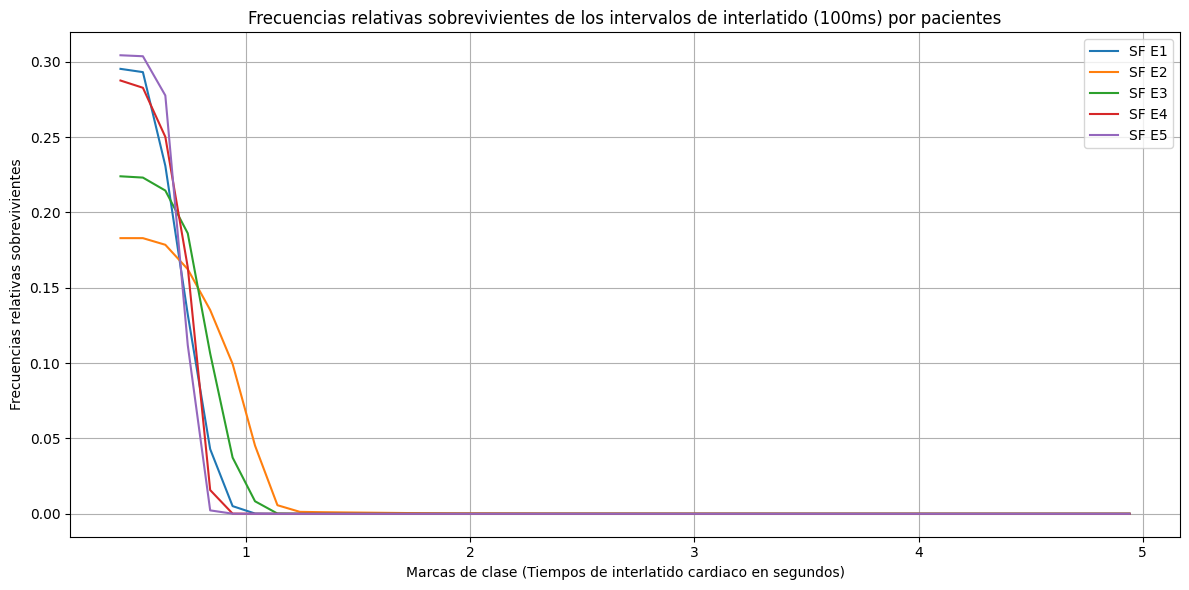

In [266]:
# Definir límites de intervalos basados en los datos reales (100 ms)
min_val = df_sanos['Tiempos de interlatido'].min()
max_val = df_sanos['Tiempos de interlatido'].max()
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Crear una lista de pacientes
pacientes = df_sanos['Paciente'].unique()

# Inicializar un DataFrame para las frecuencias absolutas sobrevivientes de cada paciente
frecuencias_absolutas_sobrevivientes = pd.DataFrame(index=intervalos)

# Calcular las frecuencias absolutas sobrevivientes para cada paciente
for paciente in pacientes:
    datos_paciente = df_sanos[df_sanos['Paciente'] == paciente]
    frecuencias_absolutas = pd.cut(datos_paciente['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
    frecuencias_sobrevivientes = frecuencias_absolutas[::-1].cumsum()[::-1]
    frecuencias_absolutas_sobrevivientes[f'SF E{paciente[-1]}'] = frecuencias_sobrevivientes

# Calcular las frecuencias absolutas sobrevivientes totales
frecuencias_absolutas_sobrevivientes['FE'] = frecuencias_absolutas_sobrevivientes.sum(axis=1)

# Calcular límites superiores (LS), marcas de clase (MC), y la longitud del intervalo (U)
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]
U = [interval.length for interval in intervalos]

# Crear DataFrame para las frecuencias relativas sobrevivientes por grupos
tabla_frecuencias_rel_sobrevivientes = pd.DataFrame({
    'U': U,
    'LS': LS,
    'MC': MC,
    'FE': frecuencias_absolutas_sobrevivientes['FE'].values
})

# Añadir columnas de frecuencias sobrevivientes de cada paciente
for paciente in pacientes:
    tabla_frecuencias_rel_sobrevivientes[f'SF E{paciente[-1]}'] = frecuencias_absolutas_sobrevivientes[f'SF E{paciente[-1]}'].values

# Calcular las frecuencias relativas
for paciente in pacientes:
    columna = f'SF E{paciente[-1]}'
    tabla_frecuencias_rel_sobrevivientes[columna] = tabla_frecuencias_rel_sobrevivientes[columna] / tabla_frecuencias_rel_sobrevivientes[columna].sum()

# Calcular la frecuencia relativa total
tabla_frecuencias_rel_sobrevivientes['FE'] = tabla_frecuencias_rel_sobrevivientes['FE'] / tabla_frecuencias_rel_sobrevivientes['FE'].sum()

# Imprimir la tabla de frecuencias relativas sobrevivientes
print("Tabla de frecuencias relativas sobrevivientes de los pacientes sanos:")
print(tabla_frecuencias_rel_sobrevivientes)

# Graficar las frecuencias relativas sobrevivientes por pacientes
plt.figure(figsize=(12, 6))
for paciente in pacientes:
    columna = f'SF E{paciente[-1]}'
    plt.plot(tabla_frecuencias_rel_sobrevivientes['MC'], tabla_frecuencias_rel_sobrevivientes[columna], label=columna)

plt.xlabel('Marcas de clase (Tiempos de interlatido cardiaco en segundos)')
plt.ylabel('Frecuencias relativas sobrevivientes')
plt.title('Frecuencias relativas sobrevivientes de los intervalos de interlatido (100ms) por pacientes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Frecuencias relativas sobrevivientes por grupo

Tabla de frecuencias relativas sobrevivientes por grupo:
       LI     LS     MC      SF s      SF e          SF t
0   0.391  0.491  0.441  0.256362  0.239844  2.479828e-01
1   0.491  0.591  0.541  0.254710  0.239837  2.471652e-01
2   0.591  0.691  0.641  0.228885  0.209643  2.191244e-01
3   0.691  0.791  0.741  0.152555  0.165583  1.591636e-01
4   0.791  0.891  0.841  0.063222  0.087422  7.549810e-02
5   0.891  0.991  0.941  0.030071  0.050716  4.054343e-02
6   0.991  1.091  1.041  0.011376  0.006902  9.106418e-03
7   1.091  1.191  1.141  0.001236  0.000040  6.289325e-04
8   1.191  1.291  1.241  0.000271  0.000003  1.353952e-04
9   1.291  1.391  1.341  0.000223  0.000002  1.109367e-04
10  1.391  1.491  1.441  0.000190  0.000002  9.433987e-05
11  1.491  1.591  1.541  0.000160  0.000002  7.949008e-05
12  1.591  1.691  1.641  0.000128  0.000002  6.376676e-05
13  1.691  1.791  1.741  0.000098  0.000002  4.891697e-05
14  1.791  1.891  1.841  0.000071  0.000002  3.581421e-05
15  1.891  1.99

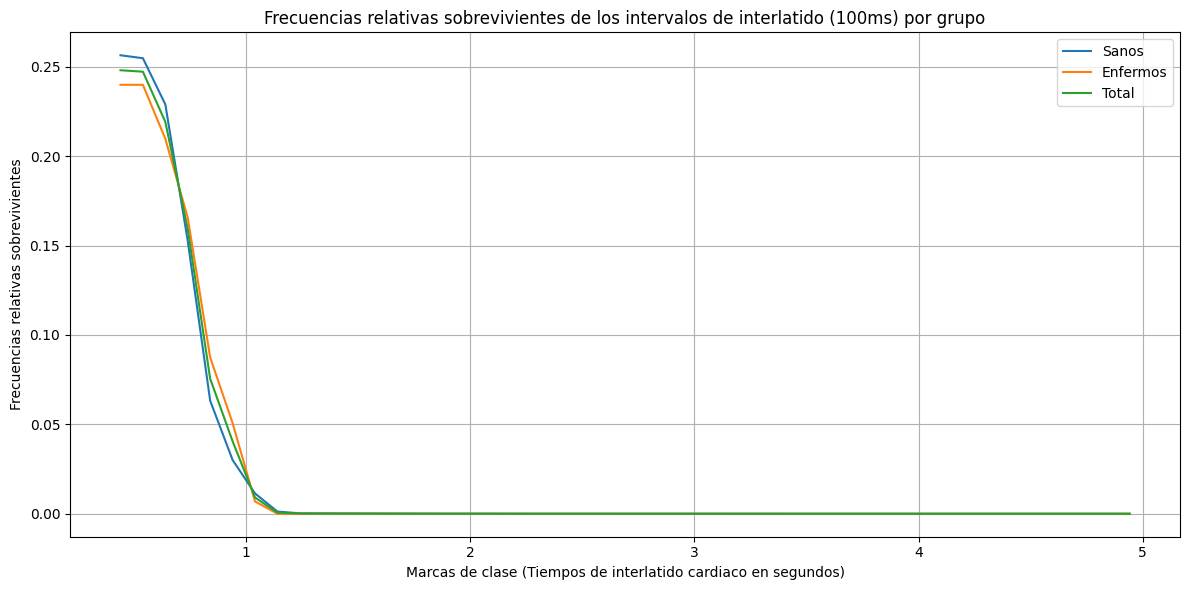

In [267]:
# Definir límites de intervalos basados en los datos reales (100 ms)
min_val = min(df_sanos['Tiempos de interlatido'].min(), df_enfermos['Tiempos de interlatido'].min())
max_val = max(df_sanos['Tiempos de interlatido'].max(), df_enfermos['Tiempos de interlatido'].max())
intervalos = pd.interval_range(start=min_val, end=max_val, freq=0.1)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular las frecuencias absolutas sobrevivientes
frecuencias_sobrevivientes_sanos = frecuencias_absolutas_sanos[::-1].cumsum()[::-1]
frecuencias_sobrevivientes_enfermos = frecuencias_absolutas_enfermos[::-1].cumsum()[::-1]

# Calcular las frecuencias absolutas sobrevivientes totales
frecuencias_sobrevivientes_totales = frecuencias_sobrevivientes_sanos + frecuencias_sobrevivientes_enfermos

# Calcular límites inferiores (LI), límites superiores (LS) y marcas de clase (MC)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]

# Crear DataFrame para las frecuencias relativas sobrevivientes por grupo
tabla_frecuencias_rel_sobrevivientes = pd.DataFrame({
    'LI': LI,
    'LS': LS,
    'MC': MC,
    'SF s': frecuencias_sobrevivientes_sanos.values,
    'SF e': frecuencias_sobrevivientes_enfermos.values,
    'SF t': frecuencias_sobrevivientes_totales.values
})

# Calcular las frecuencias relativas
tabla_frecuencias_rel_sobrevivientes['SF s'] = tabla_frecuencias_rel_sobrevivientes['SF s'] / tabla_frecuencias_rel_sobrevivientes['SF s'].sum()
tabla_frecuencias_rel_sobrevivientes['SF e'] = tabla_frecuencias_rel_sobrevivientes['SF e'] / tabla_frecuencias_rel_sobrevivientes['SF e'].sum()
tabla_frecuencias_rel_sobrevivientes['SF t'] = tabla_frecuencias_rel_sobrevivientes['SF t'] / tabla_frecuencias_rel_sobrevivientes['SF t'].sum()

# Imprimir la tabla de frecuencias relativas sobrevivientes por grupo
print("Tabla de frecuencias relativas sobrevivientes por grupo:")
print(tabla_frecuencias_rel_sobrevivientes)

# Graficar las frecuencias relativas sobrevivientes por grupo
plt.figure(figsize=(12, 6))
plt.plot(tabla_frecuencias_rel_sobrevivientes['MC'], tabla_frecuencias_rel_sobrevivientes['SF s'], label='Sanos')
plt.plot(tabla_frecuencias_rel_sobrevivientes['MC'], tabla_frecuencias_rel_sobrevivientes['SF e'], label='Enfermos')
plt.plot(tabla_frecuencias_rel_sobrevivientes['MC'], tabla_frecuencias_rel_sobrevivientes['SF t'], label='Total')

plt.xlabel('Marcas de clase (Tiempos de interlatido cardiaco en segundos)')
plt.ylabel('Frecuencias relativas sobrevivientes')
plt.title('Frecuencias relativas sobrevivientes de los intervalos de interlatido (100ms) por grupo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Funciones

## Función de densidad probabilidad

## Función de distribución de la muestra

# Determinación de la función de densidad de probabilidad teórica

# Comparación entre función de distribución de la muestra y la teórica

# Determinaciones

## Primeros tres momentos(Usar la definición en base a la esperanza matemática)

## Coeficiente de variación

## Sesgo

## Kurtosis(Cómo se comparan los valores experimentales con los obtenidos de la función téorica)

# Intervalos

## Intervalo de confianza para la media de la población

## Intervalo de confianza para la varianza de la población

# Pruebas

## Prueba *t_Student*

## Prueba Chi-cuadrada

## Prueba de Kolmogorov - Smirnov